**Exploratory Data Analysis for the catalog of quasar candidates of G. Richards et al. 2015 ApJS 219 39**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#%matplotlib inline

# READING DATA

Let's read the catalog. The separator is '|', the data doesn't contain a header and missing values are just spaces, so we need to skip them. Morover, the file is very large so we have to set low_memory to False.

In [2]:
catalog = pd.read_csv("cand.dat",
                      sep='|',
                      header=None,
                      skipinitialspace=True,
                      low_memory=False
                     )
print(catalog)

                           0       1   2       3       4       5       6   \
0         0.000629  35.517841  U      NaN  18.571  18.330  18.197  18.241   
1         0.000831  15.197328  U      NaN  22.647  21.808  20.873  20.615   
2         0.001527  27.732283  U      NaN  22.052  21.703  21.603  21.550   
3         0.001914   9.385637  U      NaN  18.395  18.375  18.299  18.178   
4         0.002595  31.328981  U      NaN  19.592  19.431  19.425  19.285   
...                       ...     ...  ..     ...     ...     ...     ...   
885498  359.999115  28.954735  U      NaN  21.994  21.351  21.391  21.311   
885499  359.999115   1.647538  U      NaN  20.256  20.296  19.944  19.722   
885500  359.999207  -4.507331  U      NaN  21.573  20.703  20.288  20.144   
885501  359.999756  -9.776147  U      NaN  21.366  21.403  21.133  21.157   
885502  359.999756  20.721079  U      NaN  20.086  20.126  20.110  19.909   

            7       8       9   ...     50    51    52     53    54  55  56

# DATA WRANGLING

## Splitting the first column

We can see that the first and the second columns with right ascention and declination are merged together. Indeed, the source file creator didn't add '|' sign between the first and the second column. We'll now split the 0th column into two new columns and insert them into the original data. The readme file declares these two columns to have constant lenght, each of 10 chars, including 6 digits after the coma, but we already skipped spaces from the left-hand side while reading data from the file, so we should now iterate the strings from the end.

In [3]:
RA = catalog[0].str[:-11].astype("float64")
# OR (more computationally complex):
#     RA = catalog[0].apply(lambda x: x[:x.find(' ')]).astype("float64")
# OR (slower and more complex, but for both coordinates at once):
#     RADEC = catalog[0].str.split(expand=True).astype("float64")
RA

0           0.000629
1           0.000831
2           0.001527
3           0.001914
4           0.002595
             ...    
885498    359.999115
885499    359.999115
885500    359.999207
885501    359.999756
885502    359.999756
Name: 0, Length: 885503, dtype: float64

In [4]:
DEC = catalog[0].str[-10:].astype("float64")
DEC

0         35.517841
1         15.197328
2         27.732283
3          9.385637
4         31.328981
            ...    
885498    28.954735
885499     1.647538
885500    -4.507331
885501    -9.776147
885502    20.721079
Name: 0, Length: 885503, dtype: float64

In [5]:
catalog.drop(columns=0, inplace=True)
catalog.insert(0, -1, RA)
catalog.insert(1, 0, DEC)

In [6]:
catalog.columns

Int64Index([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
            16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
            33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

## Importing column names

The catalog file does not have column names, so we import these names from another file with data extracted from the attached readme.

In [7]:
cols_data = pd.read_csv("cand_cols.dat", sep='\s+')
cols = cols_data["Label"]

In [8]:
cols

0     RAdeg
1     DEdeg
2     Class
3       zsp
4      umag
      ...  
56      Leg
57      Uni
58     Prim
59       pm
60       DB
Name: Label, Length: 61, dtype: object

Now, we can apply the right column names to our data frame. Before that, we have to align the cols series with the strange column indexing of the catalog data frame after the modifications we made above.

In [9]:
cols.rename(index={k+1:k for k in catalog.columns}, inplace=True)
cols

-1     RAdeg
 0     DEdeg
 1     Class
 2       zsp
 3      umag
       ...  
 55      Leg
 56      Uni
 57     Prim
 58       pm
 59       DB
Name: Label, Length: 61, dtype: object

In [10]:
catalog.rename(columns=cols, inplace=True)
catalog

RAdeg      DEdeg   Class  zsp    umag    gmag    rmag    imag  \
0         0.000629  35.517841  U       NaN  18.571  18.330  18.197  18.241   
1         0.000831  15.197328  U       NaN  22.647  21.808  20.873  20.615   
2         0.001527  27.732283  U       NaN  22.052  21.703  21.603  21.550   
3         0.001914   9.385637  U       NaN  18.395  18.375  18.299  18.178   
4         0.002595  31.328981  U       NaN  19.592  19.431  19.425  19.285   
...            ...        ...     ...  ...     ...     ...     ...     ...   
885498  359.999115  28.954735  U       NaN  21.994  21.351  21.391  21.311   
885499  359.999115   1.647538  U       NaN  20.256  20.296  19.944  19.722   
885500  359.999207  -4.507331  U       NaN  21.573  20.703  20.288  20.144   
885501  359.999756  -9.776147  U       NaN  21.366  21.403  21.133  21.157   
885502  359.999756  20.721079  U       NaN  20.086  20.126  20.110  19.909   

          zmag  3.6mag  ...  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  Uni  \
0       18.089  17.119  ...  0.893      NaN    NaN      NaN     NaN    1    0   
1       20.326  18.845  ...  0.967     0.05   0.50    0.275    0.89    1    0   
2       21.915  20.174  ...  0.685      NaN    NaN      NaN     NaN    1    0   
3       18.004  17.888  ...  0.847     1.55   2.15    2.025    0.99    1    0   
4       18.907  18.903  ...  0.960      NaN    NaN      NaN     NaN    1    0   
...        ...     ...  ...    ...      ...    ...      ...     ...  ...  ...   
885498  20.869  19.902  ...  0.585      NaN    NaN      NaN     NaN    1    0   
885499  19.793  18.962  ...  0.903     1.05   1.55    1.225    0.90    1    0   
885500  19.979  20.180  ...  0.755      NaN    NaN      NaN     NaN    1    0   
885501  21.024  19.076  ...  0.450      NaN    NaN      NaN     NaN    1    0   
885502  19.770  19.520  ...  0.943      NaN    NaN      NaN     NaN    1    0   

            Prim     pm  DB  
0        1048578  0.963   1  
1              0    NaN   1  
2              0    NaN   1  
3              0    NaN   1  
4              3    NaN   3  
...          ...    ...  ..  
885498         0    NaN   2  
885499         0    NaN   1  
885500         0    NaN   2  
885501  33554432    NaN   1  
885502         0    NaN   1  

[885503 rows x 61 columns]

# DATA CLEANING AND FILTERING

## Removing unnecessary spaces

After fixing the data frame initially, we need to strip the Class column out of unnecessary spaces.

In [11]:
catalog["Class"] = catalog.Class.str.strip()

## Handling duplicates

Now we can proceed with further data cleaning. We check whether there are duplicated rows.

In [12]:
catalog[catalog.duplicated()]

Empty DataFrame
Columns: [RAdeg, DEdeg, Class, zsp, umag, gmag, rmag, imag, zmag, 3.6mag, 4.5mag, e_umag, e_gmag, e_rmag, e_imag, e_zmag, e_3.6mag, e_4.5mag, Fu, Fg, Fr, Fi, Fz, F3.6, F4.5, e_Fu, e_Fg, e_Fr, e_Fi, e_Fz, e_F3.6, e_F4.5, Ymag, Jmag, Hmag, Kmag, e_Ymag, e_Jmag, e_Hmag, e_Kmag, FUV, NUV, e_FUV, e_NUV, gisig, Au, den*, denq, b_zphO, zphO, B_zphO, zphOP, b_zphIR, zphIR, B_zphIR, zphIRP, Leg, Uni, Prim, pm, DB]
Index: []

[0 rows x 61 columns]

There are no full duplicates (with all the columns the same). Let's search by coordinates only, though.

In [13]:
catalog[catalog.duplicated(subset=["RAdeg","DEdeg"], keep=False)]

RAdeg      DEdeg Class      zsp    umag    gmag    rmag    imag  \
40812    11.308868  -0.338728   QSO  2.39374  21.380  20.546  20.577  20.623   
40813    11.308868  -0.338728   QSO  2.39374  21.380  20.546  20.577  20.623   
127149   35.614979  -3.052516     U      NaN  23.808  21.383  21.158  20.977   
127150   35.614979  -3.052516     U      NaN  23.808  21.383  21.158  20.977   
306814  150.181854   1.669226   QSO  2.02600  20.434  20.227  20.335  20.205   
306815  150.181854   1.669226   QSO  2.02600  20.434  20.227  20.335  20.205   
358358  161.625305  56.105667     U      NaN  22.516  22.252  22.116  21.795   
358359  161.625305  56.105667     U      NaN  22.516  22.252  22.116  21.795   
360701  162.107987  57.099571     U      NaN  21.443  21.225  21.162  21.011   
360702  162.107987  57.099571     U      NaN  21.443  21.225  21.162  21.011   
360761  162.119247  57.873173     U      NaN  23.606  22.138  21.817  21.531   
360763  162.119247  57.873173     U      NaN  23.606  22.138  21.817  21.531   
722080  241.718948  55.399460     U      NaN  21.283  20.996  20.987  20.838   
722081  241.718948  55.399460     U      NaN  21.283  20.996  20.987  20.838   
725987  243.723496  53.671902     U      NaN  21.629  21.197  20.793  20.484   
725988  243.723496  53.671902     U      NaN  21.629  21.197  20.793  20.484   
729579  245.993195  54.811718     U      NaN  21.564  20.614  20.399  20.427   
729580  245.993195  54.811718     U      NaN  21.564  20.614  20.399  20.427   

          zmag  3.6mag  ...  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  Uni  \
40812   20.356  19.353  ...  0.925      2.3   2.55    2.375    0.93    1    0   
40813   20.356  19.294  ...  0.907      2.3   2.55    2.375    0.93    1    0   
127149  20.967  19.994  ...  0.926      NaN    NaN      NaN     NaN    1    0   
127150  20.967  19.946  ...  0.898      NaN    NaN      NaN     NaN    1    0   
306814  20.044  18.910  ...  0.792      NaN    NaN      NaN     NaN    1    0   
306815  20.044  19.405  ...  0.878      NaN    NaN      NaN     NaN    1    0   
358358  21.913  19.284  ...  0.470      NaN    NaN      NaN     NaN    1    0   
358359  21.913  19.502  ...  0.609      NaN    NaN      NaN     NaN    1    0   
360701  20.864  19.659  ...  0.415      NaN    NaN      NaN     NaN    1    0   
360702  20.864  19.547  ...  0.732      NaN    NaN      NaN     NaN    1    0   
360761  21.406  20.547  ...  0.635      NaN    NaN      NaN     NaN    1    0   
360763  21.406  20.250  ...  0.469      NaN    NaN      NaN     NaN    1    0   
722080  20.699  20.551  ...  0.820      NaN    NaN      NaN     NaN    1    0   
722081  20.699  20.146  ...  0.850      NaN    NaN      NaN     NaN    1    0   
725987  20.299  19.235  ...  0.670      NaN    NaN      NaN     NaN    1    0   
725988  20.299  19.369  ...  0.484      NaN    NaN      NaN     NaN    1    0   
729579  20.269  19.269  ...  0.812      NaN    NaN      NaN     NaN    1    0   
729580  20.269  19.625  ...  0.893      NaN    NaN      NaN     NaN    1    0   

            Prim  pm  DB  
40812          0 NaN   2  
40813          0 NaN   2  
127149         0 NaN   2  
127150         0 NaN   2  
306814  33554432 NaN   1  
306815         0 NaN   1  
358358         0 NaN   1  
358359         0 NaN   1  
360701  33554432 NaN   1  
360702         0 NaN   1  
360761         0 NaN   2  
360763         0 NaN   2  
722080  33554432 NaN   1  
722081         0 NaN   1  
725987         0 NaN   1  
725988         0 NaN   1  
729579         0 NaN   2  
729580         0 NaN   2  

[18 rows x 61 columns]

It turned out, we have 9 pairs of duplicated objects.

In [14]:
catalog[catalog.duplicated(subset=["RAdeg","DEdeg"], keep=False)].loc[:,"3.6mag":"e_F4.5"]

3.6mag  4.5mag  e_umag  e_gmag  e_rmag  e_imag  e_zmag  e_3.6mag  \
40812   19.353  19.076   0.030   0.008   0.010   0.014   0.038     0.050   
40813   19.294  18.839   0.030   0.008   0.010   0.014   0.038     0.099   
127149  19.994  19.875   0.588   0.040   0.047   0.060   0.195     0.040   
127150  19.946  19.687   0.588   0.040   0.047   0.060   0.195     0.126   
306814  18.910  18.805   0.060   0.026   0.031   0.039   0.132     0.065   
306815  19.405  19.058   0.060   0.026   0.031   0.039   0.132     0.033   
358358  19.284  19.030   0.301   0.095   0.118   0.143   0.427     0.073   
358359  19.502  19.301   0.301   0.095   0.118   0.143   0.427     0.039   
360701  19.659  19.283   0.106   0.043   0.054   0.065   0.190     0.034   
360702  19.547  19.455   0.106   0.043   0.054   0.065   0.190     0.081   
360761  20.547  20.263   0.455   0.070   0.076   0.077   0.247     0.040   
360763  20.250  20.098   0.455   0.070   0.076   0.077   0.247     0.037   
722080  20.551  20.317   0.132   0.045   0.049   0.062   0.321     0.126   
722081  20.146  20.360   0.132   0.045   0.049   0.062   0.321     0.045   
725987  19.235  18.654   0.158   0.050   0.046   0.049   0.158     0.036   
725988  19.369  18.992   0.158   0.050   0.046   0.049   0.158     0.053   
729579  19.269  19.449   0.099   0.040   0.037   0.047   0.105     0.044   
729580  19.625  19.310   0.099   0.040   0.037   0.047   0.105     0.038   

        e_4.5mag    Fu  ...    Fz   F3.6    F4.5  e_Fu  e_Fg  e_Fr  e_Fi  \
40812      0.055  2.64  ...  7.00  65.73   84.84  0.07  0.04  0.05  0.07   
40813      0.129  2.64  ...  7.00  69.37  105.49  0.07  0.04  0.05  0.07   
127149     0.042  0.20  ...  3.83  36.32   40.55  0.19  0.09  0.14  0.22   
127150     0.200  0.20  ...  3.83  37.98   48.22  0.19  0.09  0.14  0.22   
306814     0.113  6.20  ...  9.33  98.72  108.74  0.34  0.18  0.20  0.29   
306815     0.033  6.20  ...  9.33  62.59   86.14  0.34  0.18  0.20  0.29   
358358     0.100  0.93  ...  1.38  70.08   88.63  0.27  0.11  0.15  0.25   
358359     0.043  0.93  ...  1.38  57.36   69.00  0.27  0.11  0.15  0.25   
360701     0.034  2.57  ...  4.36  49.63   70.21  0.25  0.13  0.17  0.23   
360702     0.146  2.57  ...  4.36  55.06   59.92  0.25  0.13  0.17  0.23   
360761     0.038  0.29  ...  2.50  21.88   28.44  0.17  0.09  0.13  0.17   
360763     0.037  0.29  ...  2.50  28.78   33.09  0.17  0.09  0.13  0.17   
722080     0.192  2.97  ...  5.10  21.84   27.09  0.36  0.16  0.18  0.26   
722081     0.049  2.97  ...  5.10  31.69   26.04  0.36  0.16  0.18  0.26   
725987     0.035  2.14  ...  7.44  73.33  125.29  0.31  0.15  0.20  0.29   
725988     0.063  2.14  ...  7.44  64.80   91.71  0.31  0.15  0.20  0.29   
729579     0.089  2.28  ...  7.65  71.06   60.20  0.21  0.20  0.23  0.29   
729580     0.037  2.28  ...  7.65  51.21   68.42  0.21  0.20  0.23  0.29   

        e_Fz  e_F3.6  e_F4.5  
40812   0.25    3.00    4.29  
40813   0.25    6.33   12.53  
127149  0.74    1.32    1.57  
127150  0.74    4.41    8.88  
306814  1.15    5.91   11.32  
306815  1.15    1.88    2.59  
358358  0.80    4.71    8.16  
358359  0.80    2.07    2.71  
360701  0.81    1.57    2.20  
360702  0.81    4.11    8.06  
360761  0.66    0.81    0.99  
360763  0.66    0.99    1.12  
722080  1.57    2.53    4.79  
722081  1.57    1.31    1.18  
725987  1.11    2.40    4.08  
725988  1.11    3.16    5.32  
729579  0.75    2.88    4.93  
729580  0.75    1.80    2.35  

[18 rows x 23 columns]

In [15]:
catalog[catalog.duplicated(subset=["RAdeg","DEdeg"], keep=False)].loc[:,"gisig":"zphOP"]

gisig    Au  den*   denq  b_zphO   zphO  B_zphO  zphOP
40812    -0.9  0.08  0.00   7.24    2.23  2.405    2.68  0.925
40813    -0.9  0.08  0.00   4.29    2.22  2.375    2.64  0.907
127149    0.7  0.14  0.00   0.15    2.72  3.035    3.38  0.926
127150    0.7  0.14  0.00   0.50    2.71  2.975    3.35  0.898
306814   -0.9  0.10  0.00   5.47    0.37  0.495    0.78  0.792
306815   -1.0  0.10  0.00   4.76    1.52  1.985    2.21  0.878
358358    0.7  0.04  0.00   0.00    0.34  0.435    0.75  0.470
358359    0.7  0.04  0.00   0.15    0.32  0.545    0.88  0.609
360701   -0.7  0.03  0.00  10.57    0.39  0.455    0.98  0.415
360702   -0.7  0.03  0.00   7.17    0.35  0.455    0.96  0.732
360761    0.9  0.07  0.00   0.66    2.58  2.795    3.12  0.635
360763    0.9  0.07  0.00   0.30    2.60  2.795    3.07  0.469
722080   -0.7  0.04  0.06  11.08    1.50  2.175    2.29  0.820
722081   -0.7  0.04  0.00   0.12    2.07  2.185    2.77  0.850
725987    0.9  0.05  0.00   1.79    1.37  1.495    1.78  0.670
725988    0.9  0.05  0.00   1.75    1.41  1.495    1.78  0.484
729579   -0.7  0.05  0.00   0.23    2.38  2.675    2.98  0.812
729580   -0.7  0.05  0.00   3.85    2.31  2.645    2.91  0.893

They differ mainly in IR magnitudes and fluxes by a relatively small value (some of these differences lie within the standard errors). Most probably it was an effect of matching optical SDSS data with mid-IR WISE and Spitzer data (two different IR sources matched to one optical source). More significant differences are in values of quasar density, "denq", calculated by an algorithm. These 9 objects belong to the two biggest classes "U" and "QSO", so they might not affect the analysis significantly. However, looking at the color-color diagrams (color in astrophysics is a difference of magnitudes at different bandpasses) in Richards et al. (2015), we can see that some of these points are likely to be outliers. So, for purity, let's rule all these 18 examples out.

In [16]:
cat_duplicates = catalog[catalog.duplicated(subset=["RAdeg","DEdeg"], keep=False)]
catalog.drop_duplicates(subset=["RAdeg","DEdeg"], keep=False, inplace=True)

## Getting info about columns and handling missing values

Let's see information about the columns.

In [17]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885485 entries, 0 to 885502
Data columns (total 61 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RAdeg     885485 non-null  float64
 1   DEdeg     885485 non-null  float64
 2   Class     885485 non-null  object 
 3   zsp       151356 non-null  float64
 4   umag      885485 non-null  float64
 5   gmag      885485 non-null  float64
 6   rmag      885485 non-null  float64
 7   imag      885485 non-null  float64
 8   zmag      885485 non-null  float64
 9   3.6mag    885485 non-null  float64
 10  4.5mag    885485 non-null  float64
 11  e_umag    885485 non-null  float64
 12  e_gmag    885485 non-null  float64
 13  e_rmag    885485 non-null  float64
 14  e_imag    885485 non-null  float64
 15  e_zmag    885485 non-null  float64
 16  e_3.6mag  885485 non-null  float64
 17  e_4.5mag  885485 non-null  float64
 18  Fu        885485 non-null  float64
 19  Fg        885485 non-null  float64
 20  Fr  

We can see some of the columns contain missing values. Since these features can be treated as “nonobligatory”, we're not going to fill the missing values or remove the entire columns. Perhaps, for some analyses we will restrict to the non-null examples with respect to given features.

## Handling categorical values

There are two categorical columns "Class" and "DB". Their value counts is shown below.

In [18]:
catalog["Class"].value_counts()

U         733699
QSO       150449
STAR         743
GALAXY       557
CELG          32
??             5
Name: Class, dtype: int64

The column "Class" indicates the spectral classification of the objects. The majority of objects are unclassified candidates ("U"), then confirmed quasars ("QSO"). A small number of objects were classified as stars ("STAR") and galaxies (altogether "GALAXY" and "CELG" – compact emission line galaxy). Only a few have spectra that are difficult to classify ("??").

In [19]:
catalog.DB.value_counts()

1    670209
2    123657
3     78559
4     10172
6      2827
5        52
7         9
Name: DB, dtype: int64

“DB” is a bitwise flag indicating if the object is at low z (2^0), mid z (2^1) or high z (2^2). The ranges of z (redshift) intersect, so objects can occupy more than one of these 3 classes (plus other reasons for that). Thus, values different than 1, 2 and 4 are respective sums of these 3 numbers. For example, sources classified as both mid- and high-redshift have DB value equal 6.

## Filtering data and initial exploratory analysis

Let's split the data frame into a handful of defined column indices for convinience.

In [20]:
mag_all = catalog.columns[4:18] # SDSS optical and IR magnitudes
flux_all = catalog.columns[18:32] # SDSS optical an IR flux densities
mag_oth_all = catalog.columns[32:44] # Vega and UV magnitudes
photz = catalog.columns[48:56] # photometric redshifts
basic = catalog.columns.difference(mag_all.append([flux_all, mag_oth_all, photz]),
                                   sort=False) # basic columns, not used above
print("Basic columns:\n", basic)
print("Magnitude columns:\n", mag_all)
print("Flux columns:\n", flux_all)
print("Other magnitude columns:\n", mag_oth_all)
print("Photometric redshift columns:\n", photz)

Basic columns:
 Index(['RAdeg', 'DEdeg', 'Class', 'zsp', 'gisig', 'Au', 'den*', 'denq', 'Leg',
       'Uni', 'Prim', 'pm', 'DB'],
      dtype='object')
Magnitude columns:
 Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', '3.6mag', '4.5mag', 'e_umag',
       'e_gmag', 'e_rmag', 'e_imag', 'e_zmag', 'e_3.6mag', 'e_4.5mag'],
      dtype='object')
Flux columns:
 Index(['Fu', 'Fg', 'Fr', 'Fi', 'Fz', 'F3.6', 'F4.5', 'e_Fu', 'e_Fg', 'e_Fr',
       'e_Fi', 'e_Fz', 'e_F3.6', 'e_F4.5'],
      dtype='object')
Other magnitude columns:
 Index(['Ymag', 'Jmag', 'Hmag', 'Kmag', 'e_Ymag', 'e_Jmag', 'e_Hmag', 'e_Kmag',
       'FUV', 'NUV', 'e_FUV', 'e_NUV'],
      dtype='object')
Photometric redshift columns:
 Index(['b_zphO', 'zphO', 'B_zphO', 'zphOP', 'b_zphIR', 'zphIR', 'B_zphIR',
       'zphIRP'],
      dtype='object')


For convienience, we moreover separate columns with magnitudes and fluxes from their errors.

In [21]:
mag = mag_all[:7]
e_mag = mag_all[7:]
flux = flux_all[:7]
e_flux = flux_all[7:]
mag_oth = mag_oth_all[:4].append([mag_oth_all[8:10]])
e_mag_oth = mag_oth_all.difference(mag_oth, sort=False)

We start with taking a closer look at the part with basic features of the data.

In [22]:
catalog[basic].describe()

RAdeg          DEdeg            zsp          gisig  \
count  885485.000000  885485.000000  151356.000000  885413.000000   
mean      176.511184      20.315729       1.659668       0.074857   
std        95.115936      19.420693       0.825954       0.768075   
min         0.000629     -22.628870       0.000000      -1.000000   
25%       130.239456       4.724403       0.942640      -0.700000   
50%       178.972870      18.550541       1.590815       0.700000   
75%       225.771835      33.755344       2.275000       0.700000   
max       359.999756      84.933235       6.627860       1.000000   

                  Au           den*           denq            Leg  \
count  885485.000000  885485.000000  885485.000000  885485.000000   
mean        0.212392       0.004358       9.825593       0.887291   
std         0.152905       0.027159      22.848443       0.316237   
min         0.010000       0.000000       0.000000       0.000000   
25%         0.110000       0.000000       0.080000       1.000000   
50%         0.170000       0.000000       1.250000       1.000000   
75%         0.270000       0.000000       8.190000       1.000000   
max         1.000000       1.150000     401.100000       1.000000   

                 Uni          Prim             pm             DB  
count  885485.000000  8.854850e+05  129216.000000  885485.000000  
mean        0.050308  1.937304e+07       4.162261       1.367807  
std         0.218580  5.233778e+07       3.598727       0.737394  
min         0.000000  0.000000e+00       0.005000       1.000000  
25%         0.000000  0.000000e+00       1.946000       1.000000  
50%         0.000000  1.000000e+00       3.351000       1.000000  
75%         0.000000  3.355443e+07       5.350250       1.000000  
max         1.000000  6.731925e+08     192.735000       7.000000

The thing that we should pay our attention to is that there are objects having spectroscopic redshift equal to 0.000000. This isn't expected, since we're investigating quasars, which are extragalactic objects. Let's check those objects.

In [23]:
catalog[catalog.zsp==0]

RAdeg      DEdeg Class  zsp    umag    gmag    rmag    imag  \
283028  144.872376  52.911144  STAR  0.0  20.781  19.289  18.603  18.329   
483821  187.882156  11.098464  STAR  0.0  21.195  20.102  19.820  19.718   
557563  203.165314   9.644262  STAR  0.0  20.594  19.599  19.294  19.205   
592049  210.347549  24.413809  STAR  0.0  21.679  20.890  20.752  20.733   
728107  245.032517  46.902382  STAR  0.0  24.188  23.123  21.648  20.080   

          zmag  3.6mag  ...  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  Uni  \
283028  18.199  19.104  ...  0.463      NaN    NaN      NaN     NaN    1    0   
483821  19.668  19.611  ...  0.909     2.55   3.25    2.825    0.99    1    0   
557563  19.154  19.296  ...  0.909      NaN    NaN      NaN     NaN    1    0   
592049  20.230  20.221  ...  0.927      NaN    NaN      NaN     NaN    1    0   
728107  20.401  19.988  ...  0.899      NaN    NaN      NaN     NaN    1    0   

        Prim     pm  DB  
283028     0    NaN   2  
483821     0  5.114   2  
557563     0    NaN   2  
592049     0    NaN   2  
728107     0    NaN   4  

[5 rows x 61 columns]

They're all stars. Let's see the distribution of redshift among the stars.

In [24]:
catalog[catalog["Class"]=="STAR"].zsp.describe()

count    318.000000
mean       0.000326
std        0.000456
min        0.000000
25%        0.000090
50%        0.000200
75%        0.000420
max        0.004040
Name: zsp, dtype: float64

In [25]:
catalog[catalog["Class"]=="STAR"].zsp.isnull().sum()

425

Although with a very tiny fraction of 743, confirmed stars are present in this catalog, because they were gone through by the algorithm of Richards et al. (2015). They're so called contaminants, that shouldn't be here, as they're obviously not quasars. However, their presence in the catalog can turn out to be useful for future classification, because there can be even more stars, in this catalog, under the class “U” (unclassified). Same applies for galaxies (classes “GALAXY” and “CELG” – compact emission line galaxy). 

Redshift values of these stars are relatively small which can indicate that these objects are located within our Galaxy or in its proximity, as expected. Let's take a look at redshifts (first spectroscopic, then photometric) of other objects classes.

In [26]:
catalog.groupby("Class").zsp.describe().T

Class   ??       CELG      GALAXY            QSO        STAR    U
count  0.0  32.000000  557.000000  150449.000000  318.000000  0.0
mean   NaN   0.596788    0.397855       1.668072    0.000326  NaN
std    NaN   0.291337    0.236588       0.821014    0.000456  NaN
min    NaN   0.247200    0.004720       0.063610    0.000000  NaN
25%    NaN   0.358350    0.230060       0.953530    0.000090  NaN
50%    NaN   0.543700    0.330480       1.597540    0.000200  NaN
75%    NaN   0.750725    0.539850       2.278240    0.000420  NaN
max    NaN   1.390600    1.000810       6.627860    0.004040  NaN

In [27]:
catalog.groupby("Class").zphO.describe().T

Class        ??       CELG      GALAXY            QSO        STAR  \
count  5.000000  32.000000  557.000000  150449.000000  743.000000   
mean   3.175000   2.651875    1.575467       1.620941    2.662564   
std    0.468135   1.295669    1.279714       0.905081    0.947910   
min    2.615000   0.005000    0.005000       0.005000    0.005000   
25%    2.785000   2.567500    0.435000       0.895000    2.275000   
50%    3.235000   2.760000    1.205000       1.525000    2.685000   
75%    3.545000   3.550000    2.435000       2.245000    2.975000   
max    3.695000   4.805000    4.875000     100.000000    6.315000   

Class              U  
count  733699.000000  
mean        1.216154  
std         0.935911  
min         0.005000  
25%         0.455000  
50%         1.095000  
75%         1.715000  
max       100.000000

Photometric redshift equal to 100 for a quasar must be an outlier. We'll check it out later.

In [28]:
catalog[photz.append(pd.Index(["Class"]))][catalog["zphO"]>10]

b_zphO   zphO  B_zphO  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP Class
157916   100.0  100.0   100.0  100.0      NaN    NaN      NaN     NaN     U
307605   100.0  100.0   100.0  100.0      NaN    NaN      NaN     NaN   QSO
532543   100.0  100.0   100.0  100.0      NaN    NaN      NaN     NaN     U
725957   100.0  100.0   100.0  100.0      NaN    NaN      NaN     NaN     U

Let's check other columns.

In [29]:
catalog[mag_all].describe()

umag           gmag           rmag           imag  \
count  885485.000000  885485.000000  885485.000000  885485.000000   
mean       21.213529      20.773073      20.502501      20.318496   
std         1.389072       1.144163       1.032387       0.969316   
min        15.098000      15.053000      15.083000      14.948000   
25%        20.316000      20.032000      19.841000      19.705000   
50%        21.104000      20.784000      20.546000      20.380000   
75%        21.974000      21.525000      21.216000      21.002000   
max        31.641000      27.303000      25.855000      24.992000   

                zmag         3.6mag         4.5mag         e_umag  \
count  885485.000000  885485.000000  885485.000000  885485.000000   
mean       20.167006      19.019171      18.722066       0.170301   
std         0.931139       0.830778       0.876576       0.263525   
min        15.033000      12.850000      12.508000       0.003000   
25%        19.595000      18.552000      18.228000       0.047000   
50%        20.223000      19.130000      18.845000       0.086000   
75%        20.806000      19.603000      19.336000       0.178000   
max        24.491000      23.769000      24.124000      99.990000   

              e_gmag         e_rmag         e_imag         e_zmag  \
count  885485.000000  885485.000000  885485.000000  885485.000000   
mean        0.048240       0.045585       0.051797       0.146897   
std         0.086935       0.056397       0.059476       0.135068   
min         0.003000       0.002000       0.002000       0.003000   
25%         0.022000       0.021000       0.024000       0.062000   
50%         0.032000       0.032000       0.038000       0.110000   
75%         0.052000       0.054000       0.063000       0.187000   
max        43.330000      17.932000      20.666000      15.067000   

            e_3.6mag       e_4.5mag  
count  885485.000000  885485.000000  
mean        0.082990       0.119493  
std         0.043309       0.072590  
min         0.021000       0.018000  
25%         0.050000       0.064000  
50%         0.073000       0.104000  
75%         0.106000       0.158000  
max         0.642000       0.683000

In [30]:
catalog[catalog["e_umag"]>30][mag_all]

umag    gmag    rmag    imag    zmag  3.6mag  4.5mag  e_umag  \
130075  31.641  23.717  22.879  21.732  21.143  19.397  19.564   99.99   

        e_gmag  e_rmag  e_imag  e_zmag  e_3.6mag  e_4.5mag  
130075   0.355   0.216   0.112   0.231      0.08     0.186

At the first glance, the numbers look okay – except the max values for u and g magnitude's uncertainties (e_umag and e_gmag). They're bigger than the corresponding magnitude max values. We can leave them, if our further analysis will include errors. Otherwise, we will be treating these highly uncertain points as same reliable as others.

In [31]:
catalog[flux_all].describe()

Fu             Fg             Fr             Fi  \
count  885485.000000  885485.000000  885485.000000  885485.000000   
mean        5.761271       7.719657       9.506521      11.000178   
std        10.793666      13.123741      15.005016      16.971076   
min      -100.490000      -0.930000      -0.280000      -0.230000   
25%         1.370000       2.160000       2.990000       3.720000   
50%         3.070000       4.280000       5.550000       6.600000   
75%         6.370000       8.570000      10.610000      12.280000   
max       809.170000     758.810000     804.600000     978.420000   

                 Fz           F3.6           F4.5           e_Fu  \
count  885485.00000  885485.000000  885485.000000  885485.000000   
mean       12.35397     130.106507     178.207051       0.294082   
std        18.44211     233.293639     328.555535       0.223450   
min        -3.64000       1.120000       0.810000       0.040000   
25%         4.42000      51.950000      66.500000       0.200000   
50%         7.69000      80.240000     104.420000       0.260000   
75%        13.78000     136.770000     184.330000       0.330000   
max       944.71000   25965.700000   35612.300000      99.990000   

                e_Fg           e_Fr           e_Fi           e_Fz  \
count  885485.000000  885485.000000  885485.000000  885485.000000   
mean        0.177737       0.219492       0.298376       0.890248   
std         0.275808       0.364731       0.475169       0.542264   
min         0.020000       0.030000       0.040000       0.170000   
25%         0.100000       0.140000       0.190000       0.680000   
50%         0.130000       0.170000       0.250000       0.840000   
75%         0.180000       0.230000       0.320000       1.030000   
max        53.130000      85.040000     162.450000     128.520000   

              e_F3.6         e_F4.5  
count  885485.000000  885485.000000  
mean        6.519943      11.416911  
std         4.836270       6.046037  
min         0.090000       0.130000  
25%         5.010000       9.350000  
50%         5.770000      10.660000  
75%         6.750000      12.070000  
max       550.050000     656.000000

In [32]:
catalog[catalog["Fu"]<0].shape

(22115, 61)

Negative values of fluxes are possible, as the SDSS manual reports, along with the low signal-to-noise ratio cases. They're okay, as one can still calculate magnitudes out of such fluxes, because they're using arsinh equations for magnitudes, contrary to the classical log formulas.

In [33]:
catalog[mag_oth_all].describe()

Ymag           Jmag           Hmag           Kmag  \
count  140830.000000  171837.000000  171837.000000  171837.000000   
mean       19.093958      18.707398      18.077278      17.377159   
std         0.760528       0.738824       0.699542       0.712783   
min        14.633000      13.913000      13.219000      11.851000   
25%        18.661000      18.292000      17.701000      16.997000   
50%        19.194000      18.807000      18.186000      17.483000   
75%        19.637000      19.227000      18.564000      17.871000   
max        25.962000      20.926000      20.253000      19.547000   

              e_Ymag         e_Jmag         e_Hmag         e_Kmag  \
count  140830.000000  171837.000000  171837.000000  171837.000000   
mean        0.083759       0.092440       0.107333       0.103619   
std         0.130304       0.052075       0.056087       0.055630   
min         0.003000       0.002000       0.002000       0.001000   
25%         0.047000       0.053000       0.064000       0.062000   
50%         0.075000       0.085000       0.101000       0.096000   
75%         0.111000       0.124000       0.143000       0.137000   
max        45.567000       0.500000       0.554000       0.612000   

                FUV            NUV         e_FUV          e_NUV  
count  75940.000000  199829.000000  75940.000000  199829.000000  
mean      21.456004      21.229452      0.293984       0.231864  
std        1.069648       1.054873      0.126478       0.124044  
min       13.710000      13.830000      0.008000       0.004000  
25%       20.855000      20.587000      0.196000       0.129000  
50%       21.517000      21.312000      0.298000       0.219000  
75%       22.081000      21.943000      0.393000       0.329000  
max       24.742000      24.775000      0.543000       0.500000

Again, Y magnitude error max value is way to big.

In [34]:
catalog[photz].describe()

b_zphO           zphO         B_zphO          zphOP  \
count  885485.000000  885485.000000  885485.000000  885485.000000   
mean        1.088201       1.286433       1.505202       0.792854   
std         0.909453       0.944265       0.974585       0.279025   
min         0.000000       0.005000       0.010000       0.005000   
25%         0.380000       0.525000       0.730000       0.678000   
50%         0.940000       1.155000       1.410000       0.867000   
75%         1.540000       1.795000       2.020000       0.938000   
max       100.000000     100.000000     100.000000     100.000000   

             b_zphIR          zphIR        B_zphIR         zphIRP  
count  170728.000000  171837.000000  171837.000000  171837.000000  
mean        1.168838       1.665715       1.401535       0.918289  
std         0.824156       0.914727       0.856699       0.131994  
min         0.000000       0.050000       0.025000       0.200000  
25%         0.650000       1.000000       0.775000       0.910000  
50%         1.050000       1.450000       1.275000       0.980000  
75%         1.550000       2.100000       1.875000       0.990000  
max         5.800000       6.250000       6.225000       1.000000

Here we see again the aforementioned problem with 4 sources having photometric redshift equal to 100.

## Handling outliers

### Skewness of variables

In order to unveil outliers, let's start with checking the skewness of the data. (next time: first distribution plots, then skewness numbers)

In [35]:
catalog.skew(numeric_only=True)

RAdeg        -0.018429
DEdeg         0.352130
zsp           0.479257
umag          0.485659
gmag         -0.010567
rmag         -0.273114
imag         -0.391336
zmag         -0.388171
3.6mag       -0.802820
4.5mag       -0.754186
e_umag       67.782364
e_gmag      174.102152
e_rmag       58.802095
e_imag       62.392180
e_zmag        8.333058
e_3.6mag      1.299299
e_4.5mag      1.268863
Fu           13.402844
Fg           11.347646
Fr           10.473770
Fi           11.641917
Fz           10.736918
F3.6         23.649808
F4.5         21.239042
e_Fu        113.927647
e_Fg         38.974584
e_Fr         73.221998
e_Fi         87.393834
e_Fz         55.498614
e_F3.6       23.989148
e_F4.5       20.164149
Ymag         -0.793096
Jmag         -0.821536
Hmag         -0.952674
Kmag         -0.988217
e_Ymag      302.037677
e_Jmag        0.832743
e_Hmag        0.647967
e_Kmag        0.815853
FUV          -0.415454
NUV          -0.408502
e_FUV        -0.068333
e_NUV         0.278290
gisig      

Going from top to bottom:<br>
- RAdeg and DEdeg are celestial coordinates. Their distribution is the matter of choice, availability by the hardware and geography, necessity to avoid the Milky Way dense regions, etc. – so we don't expect normal distribution here, although the skewness is good.<br>
- zsp, the spectroscopic redshift, has good skewness.<br>
- [ugriz]mag, the optical magnitudes, have fairly symmetric distributions.<br>
- {3.6,4.5}mag, the infra-red magnitudes, have moderate skewness, which we accept.<br>
- e_\*mag, the errors of the magnitudes, are strongly skew, but they're not expected to, be normally distributed (chi-squared distribution?).<br>
- F\*, the fluxes, are highly skewed. It's accepted and we won't be dealing with this, because fluxes under the logarithm transformation give magnitues – according to the classic definition of the magnitude. In this particular case of the SDSS data, a modified arsinh formula is used, but it still mimics log to some extend.<br>
- [YJHK]mag, Vega magnitudes, are moderately skewed.<br>
- e_[YJHK]mag, errors for Vega magnitudes, are moderately skewed in three cases, and extremely in one (probably because of outliers).<br>
- [FN]UV, the ultra-violet magnitudes and their errors, are symmetric.<br>
- gisig, the indicator of distance of the g-i color from the mean, is symmetric.<br>
- den? are probability densities of the kernel density algorithm for each object, which was used by the authors to build the catalog. Their distribution are not expected to be symmetric.<br>
- \*zph{O,IR}\*, the photometric redshifts, are all highly asymetric.<br>
- pm, the proper motions, are highy asymetric, which is worth investigating (maybe it was defined as a radial speed on the sky?).<br>
- Other parameters are highly skewed. Most of them are meant to be like this.

Removing the outliers should improve the skewness, especially in the most extreme cases.

Let's check histograms and boxplots of the parameters in search for irregularities and outliers.

### “Basic” variables

Text(0.5, 0.98, 'Spectroscopic redshift')

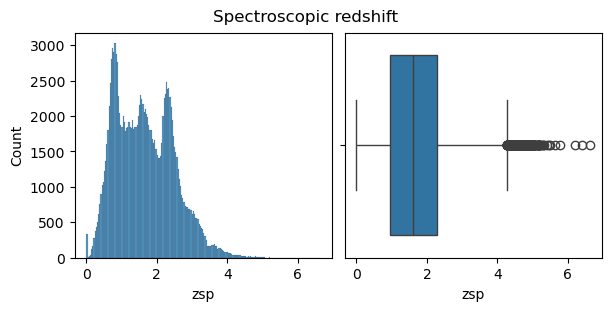

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(6,3), layout="constrained")
#axs[0].hist(catalog["zsp"].dropna(), bins=500)
#axs[1].boxplot(catalog["zsp"].dropna(), vert=False)
#axs[1].set_yticks([])
sns.histplot(ax=axs[0], x=catalog["zsp"], bins=200)
sns.boxplot(ax=axs[1], x=catalog["zsp"])
fig.suptitle("Spectroscopic redshift")
#plt.show()

In case of the spectroscopic redshift, zsp, we can see peaks in the histogram. They are caused by the selection effects in the SDSS samples coming from various data releases, see Richards et al. (2015). The Data Release 7 (DR7) quasar sample has a peak at z\~=1.5, while the DR10 quasar selection was optimized for z\~=2.5, with contamination coming at z\~=0.8. At low redshift there are, moreover, losses coming from cuts imposed on the WISE infrared data.

So, since the distribution shape is subjected to selection effect in the domain of redshift, we're not going to remove any outliers is zsp.

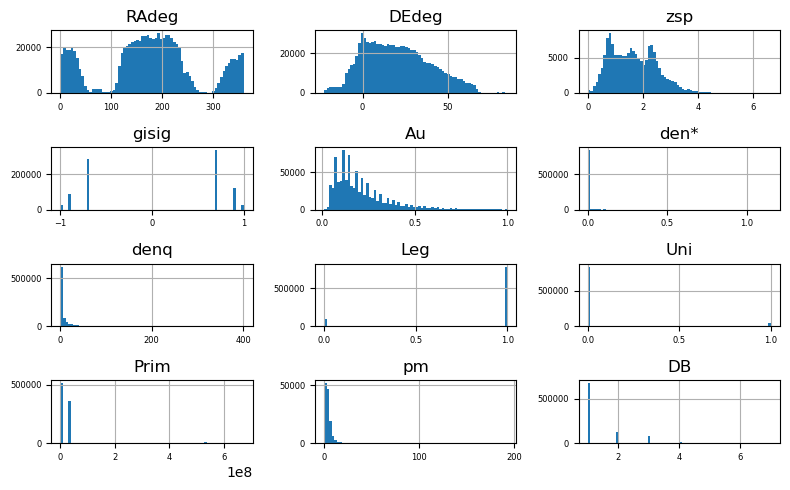

In [37]:
catalog.hist(column=basic.tolist(), bins=70, xlabelsize=6, ylabelsize=6, figsize=(8,5))
plt.tight_layout()

As already said above, we expect no symmetry in all of these distributions and outliers are naturally accepted in this set.

### SDSS and Spitzer magnitudes

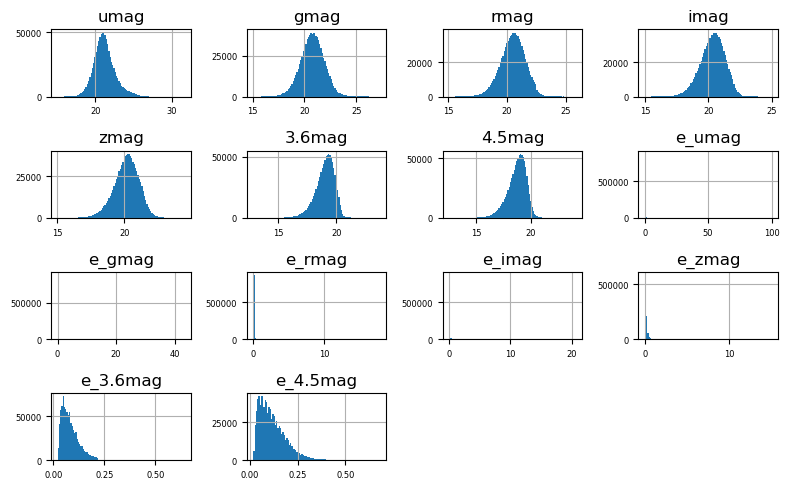

In [38]:
catalog.hist(column=mag_all.tolist(), bins=100, xlabelsize=6, ylabelsize=6, figsize=(8,5))
plt.tight_layout()

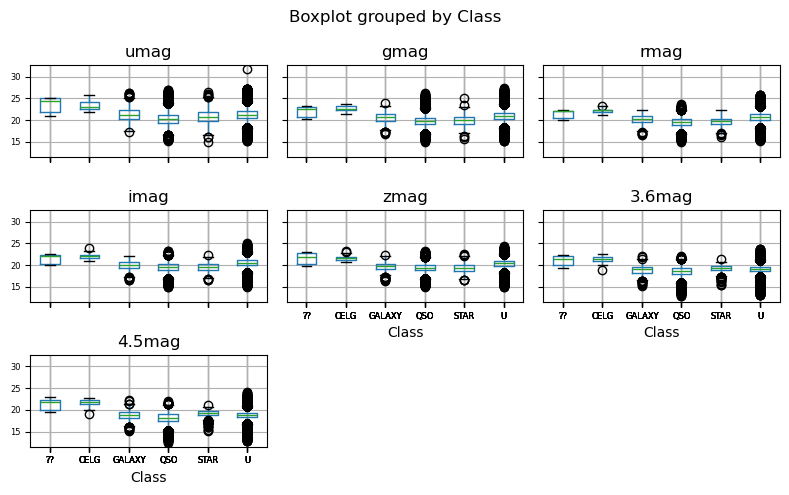

In [39]:
catalog.boxplot(column=mag.tolist(), by="Class", fontsize=6, figsize=(8,5))
plt.tight_layout()

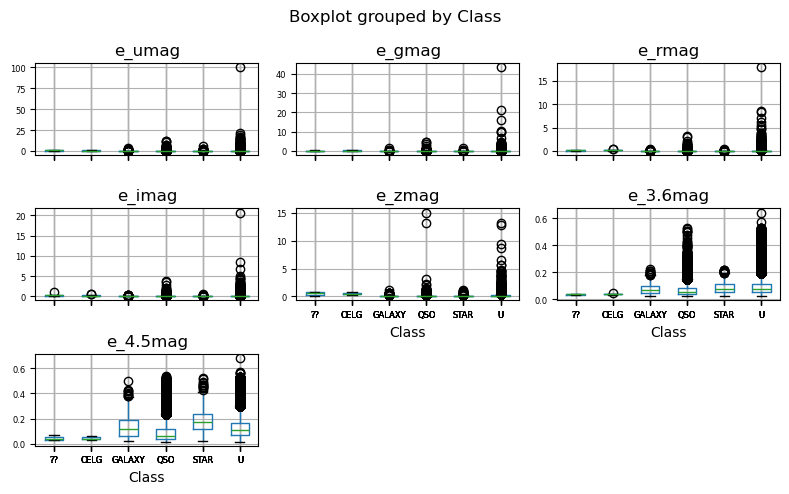

In [40]:
catalog.boxplot(column=e_mag.tolist(), 
                by="Class", 
                sharey=False,
                fontsize=6, 
                figsize=(8,5))
plt.tight_layout()

In the case of magnitudes, we classify outliers on the basis of boxplot of their values, along with the information of their uncertainties. The point #130075, we found before, is visible as an outlier in the boxplots above, and its error is so big that the “real value” of this datapoint might be placed literally anywhere on the plot, so we remove it.

Indeed, standard errors greater than 15–20 mag seem to be absurd for magnitudes with mean around 20 mag. Within a 0.95 confidence level, it means that a real star can be so faint that it can't be detected by any of our giant telescopes as well as on of the brigthest star at our sky. Therefore, it seems not to be radical to cut off all the objects which errors are greater than 15 mag.

Let's then set the cut limit for 10 mag.

In [41]:
cat_outliers = catalog.loc[[130075]]
# .loc creates a new object (here a DataFrame with one row), so no need for
# deep copying (with .copy() method or, recursively over structures, with
# copy.deepcopy())
catalog.drop(index=130075, inplace=True)
cat_outliers
# further rows can be added by pd.concat([cat_outliers, catalog.loc[[130075]]])

RAdeg    DEdeg Class  zsp    umag    gmag    rmag    imag    zmag  \
130075  36.809094 -7.63035     U  NaN  31.641  23.717  22.879  21.732  21.143   

        3.6mag  ...  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  Uni  Prim  \
130075  19.397  ...  0.534      NaN    NaN      NaN     NaN    1    0     0   

        pm  DB  
130075 NaN   6  

[1 rows x 61 columns]

In [42]:
mag_cut = catalog[e_mag].max(axis=1)>10
# OR (two-liner): mag_cut_cells = catalog[e_mag]>2 # indicates particular cells
#    mag_cut = mag_cut_cells.sum(axis=1)>=1 # indicates whole rows to be dropped
cat_outliers = pd.concat([cat_outliers, catalog[mag_cut]])
catalog.drop(index=catalog[mag_cut].index, inplace=True)
cat_outliers

RAdeg      DEdeg Class      zsp    umag    gmag    rmag    imag  \
130075   36.809094  -7.630350     U      NaN  31.641  23.717  22.879  21.732   
6886      2.072114  -3.726588     U      NaN  23.554  22.238  20.868  20.194   
24232     6.987545  21.558937     U      NaN  23.036  22.227  20.669  20.033   
48571    13.475255  32.665020     U      NaN  23.682  20.703  19.540  19.339   
104290   28.491878  30.886648     U      NaN  23.288  20.674  20.116  19.756   
232623  133.017502  64.427689     U      NaN  24.120  22.479  21.679  21.185   
254888  138.425736  39.561512     U      NaN  21.274  20.550  19.871  19.653   
282247  144.683533  21.046699     U      NaN  25.005  25.027  20.988  19.300   
285738  145.472061  59.411377     U      NaN  23.686  22.431  22.077  22.096   
309085  150.665222   0.491085   QSO  2.29872  21.284  20.759  20.790  20.848   
337620  157.142578   3.184345     U      NaN  24.813  23.516  23.412  22.375   
371868  164.371567  29.295244     U      NaN  23.917  21.919  21.588  21.082   
390041  168.099777   8.307253     U      NaN  23.680  22.270  21.805  21.040   
397474  169.608322  44.444733     U      NaN  23.690  23.058  22.487  22.071   
400516  170.227035  38.734692     U      NaN  23.066  21.431  21.094  21.127   
446871  179.861908   9.165264     U      NaN  22.869  21.061  20.356  20.279   
457156  182.045059   3.863352     U      NaN  23.989  22.667  22.156  22.033   
493386  189.891892 -22.539749     U      NaN  23.838  21.243  20.335  20.063   
511898  193.231125  11.508391   QSO  3.29300  23.513  20.694  20.339  20.308   
543140  200.095428  -1.723367     U      NaN  23.784  21.581  20.976  20.882   
581572  208.306457  31.319260     U      NaN  21.007  20.943  20.658  20.931   
585187  209.021759   5.056128   QSO  0.94390  20.568  19.561  19.462  19.532   
616223  215.265976  34.558895   QSO  4.90655  23.596  25.169  20.753  19.467   
748551  257.769440  58.741878     U      NaN  23.635  22.274  22.135  21.287   
752321  261.407562  60.326118     U      NaN  24.665  25.031  20.663  19.478   
760017  306.675903 -20.726772     U      NaN  22.839  22.191  21.703  20.846   
780165  322.790344  -1.384555     U      NaN  23.257  20.232  19.954  19.967   
791253  327.946075   2.260897   QSO  2.73200  23.134  20.816  20.648  20.592   
809303  335.044586  -7.996397     U      NaN  23.284  22.145  21.015  20.501   
809672  335.177185  38.803062     U      NaN  22.662  21.382  20.689  20.200   
866370  354.399719  26.748095     U      NaN  23.426  22.159  21.858  21.606   

          zmag  3.6mag  ...  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  Uni  \
130075  21.143  19.397  ...  0.534      NaN    NaN      NaN     NaN    1    0   
6886    19.770  17.995  ...  0.639     0.05   0.15    0.075    0.93    1    0   
24232   19.899  18.335  ...  0.412      NaN    NaN      NaN     NaN    1    0   
48571   19.268  18.849  ...  0.918      NaN    NaN      NaN     NaN    1    0   
104290  19.456  18.836  ...  0.613      NaN    NaN      NaN     NaN    1    0   
232623  19.063  18.779  ...  0.878      NaN    NaN      NaN     NaN    1    0   
254888  19.292  16.749  ...  0.572      NaN    NaN      NaN     NaN    1    0   
282247  18.487  18.569  ...  0.778      NaN    NaN      NaN     NaN    1    0   
285738  21.365  19.049  ...  0.881      NaN    NaN      NaN     NaN    1    0   
309085  20.680  19.600  ...  0.525      NaN    NaN      NaN     NaN    1    0   
337620  20.172  16.334  ...  0.957     5.50   5.55    5.525    0.37    1    0   
371868  20.062  18.790  ...  0.603      NaN    NaN      NaN     NaN    1    0   
390041  20.731  19.675  ...  0.614      NaN    NaN      NaN     NaN    1    0   
397474  21.773  19.772  ...  0.933      NaN    NaN      NaN     NaN    1    0   
400516  21.460  20.501  ...  0.543      NaN    NaN      NaN     NaN    1    0   
446871  20.161  20.358  ...  0.893      NaN    NaN      NaN     NaN    1    0   
457156  22.522  19.788  ...  0.754      NaN    NaN      NaN     NaN    1   

Our choice of cutting errors greater than 10 mag turns out not to be drastic – it rules out only 31 most uncertain magnitude measurements. Let's see the boxplots again.

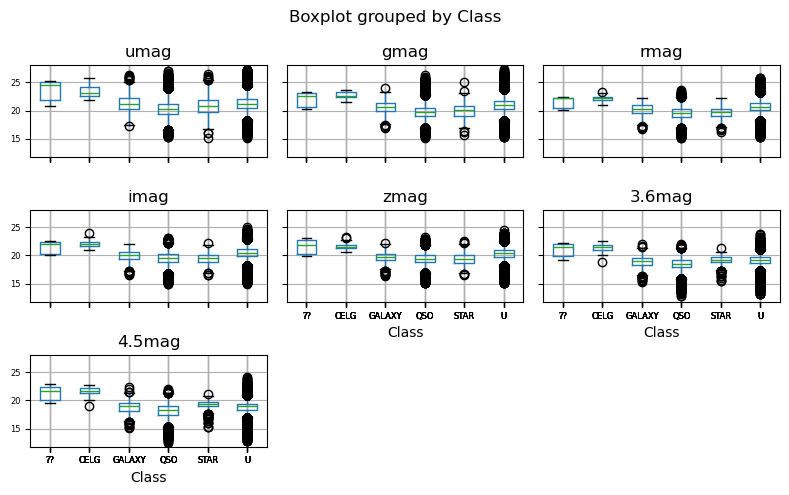

In [43]:
catalog.boxplot(column=mag.tolist(), by="Class", fontsize=6, figsize=(8,5))
plt.tight_layout()

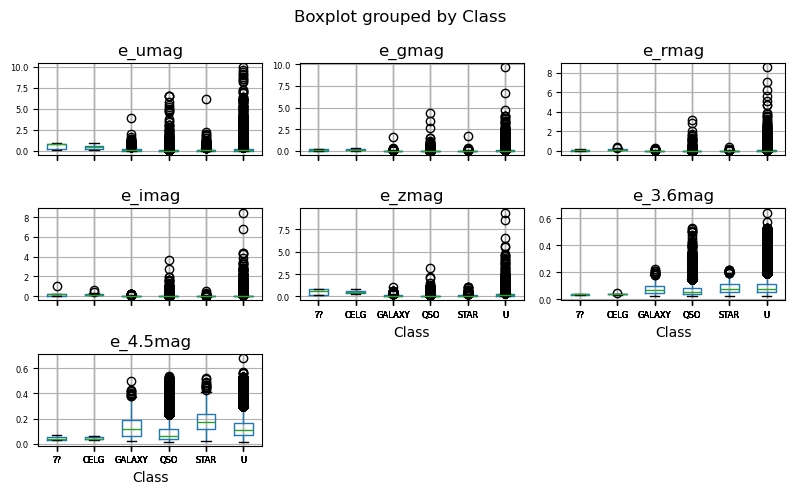

In [44]:
catalog.boxplot(column=e_mag.tolist(),
                by="Class",
                sharey=False,
                fontsize=6,
                figsize=(8,5))
plt.tight_layout()

### UKIDSS/VHS and GALEX magnitudes

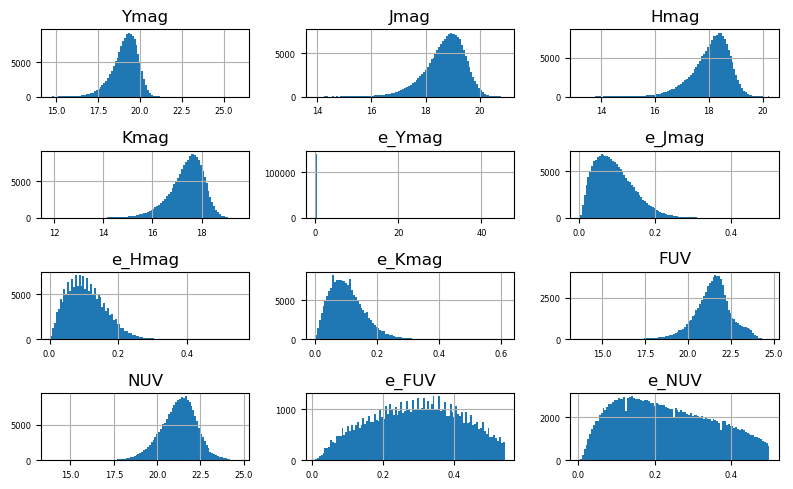

In [45]:
catalog.hist(column=mag_oth_all.tolist(), bins=100, xlabelsize=6, ylabelsize=6, figsize=(8,5))
plt.tight_layout()

The Vega and UV magnitudes have near gaussian distribution with a slight skewness. The magnitudes in Y, J, H and K bands are near-IR magnitudes and were useful for the authors to improve the photometric redshift estimates. Since, there seems to be a problem in the Ymag error, as we could see before (while describing the data), let's remove the outliers and make the boxplots.

In [46]:
mag_oth_cut = catalog[e_mag_oth].max(axis=1)>1
catalog[mag_oth_cut]

RAdeg    DEdeg Class  zsp   umag    gmag    rmag    imag    zmag  \
582375  208.477097 -7.26152     U  NaN  21.52  21.283  21.015  20.741  20.339   

        3.6mag  ...  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  Uni  \
582375  19.307  ...  0.663      NaN   1.05    0.425    0.55    0    0   

            Prim  pm  DB  
582375  33554432 NaN   1  

[1 rows x 61 columns]

In [47]:
cat_outliers = pd.concat([cat_outliers, catalog[mag_oth_cut]])
catalog.drop(index=catalog[mag_oth_cut].index, inplace=True)

So, there was only one highly uncertain point. Let's see the boxplots now.

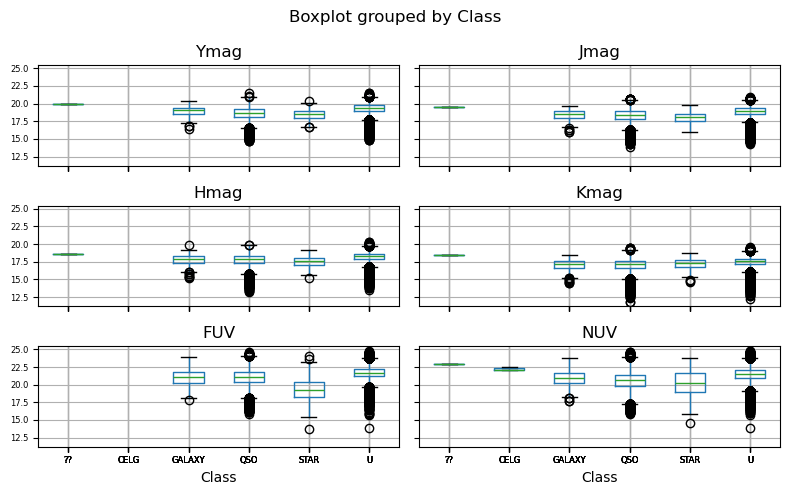

In [48]:
catalog.boxplot(column=mag_oth.tolist(), by="Class", fontsize=6, figsize=(8,5))
plt.tight_layout()

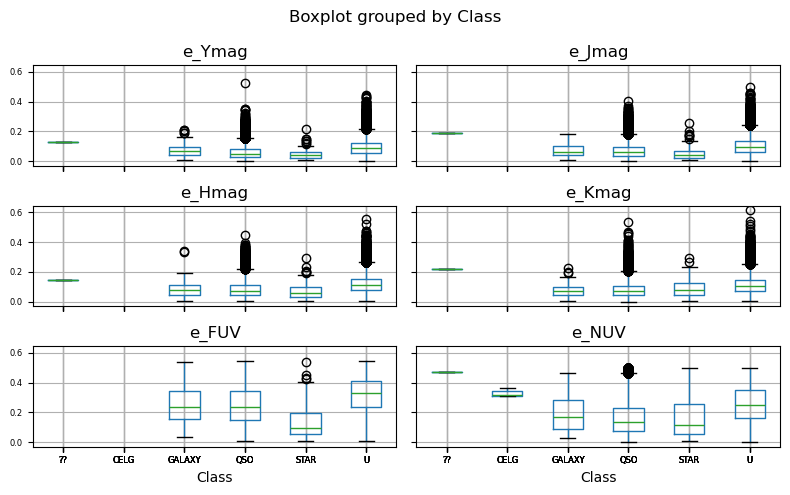

In [49]:
catalog.boxplot(column=e_mag_oth.tolist(), by="Class", fontsize=6, figsize=(8,5))
plt.tight_layout()

These boxploxes look good now.

### Fluxes

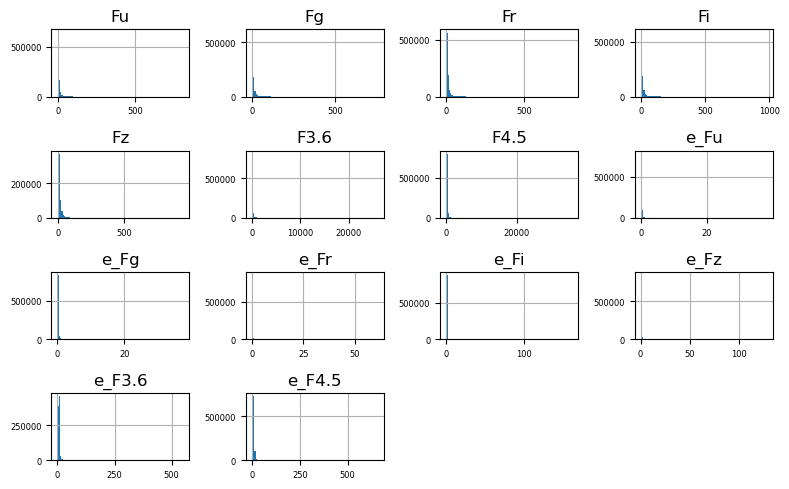

In [50]:
catalog.hist(column=flux_all.tolist(), bins=100, xlabelsize=6, ylabelsize=6, figsize=(8,5))
plt.tight_layout()

As said before, fluxes will not be in our interest anymore, since all the information about them (except lack of Galactic absorption correction) is stored in the magnitudes which we have already investigated.

### Photometric redshifts

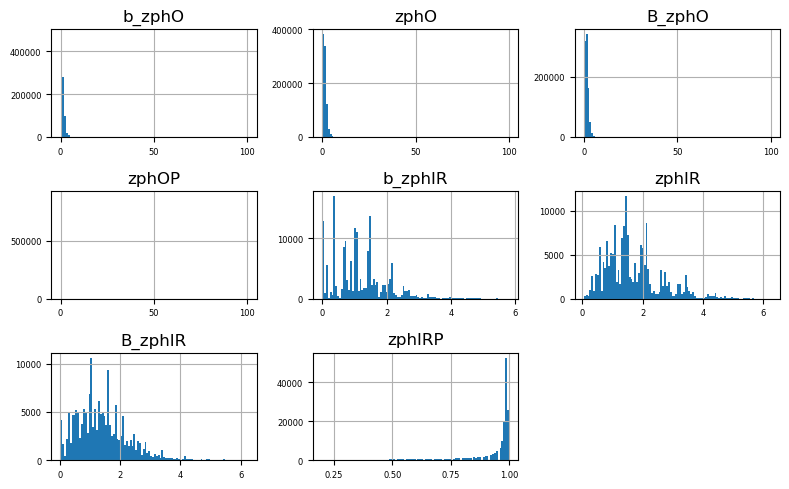

In [51]:
catalog.hist(column=photz.tolist(), bins=100, xlabelsize=6, ylabelsize=6, figsize=(8,5))
plt.tight_layout()

We can see here the effect of the four sources with erroneous photometric redshift of 100. Let's remove these objects now.

In [52]:
photz_cut = catalog[photz].max(axis=1)>7
catalog[photz_cut]

RAdeg      DEdeg Class      zsp    umag    gmag    rmag    imag  \
157916   82.824165   1.685931     U      NaN  20.780  20.330  20.023  20.146   
307605  150.346664  54.967155   QSO  0.60888  18.903  18.605  18.810  18.672   
532543  197.744614  60.498215     U      NaN  23.280  22.280  22.025  21.773   
725957  243.708191  55.747459     U      NaN  23.832  23.788  22.444  22.512   

          zmag  3.6mag  ...  zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  Uni  \
157916  19.894  18.284  ...  100.0      NaN    NaN      NaN     NaN    0    0   
307605  18.714  17.377  ...  100.0      NaN    NaN      NaN     NaN    1    0   
532543  21.461  20.547  ...  100.0      NaN    NaN      NaN     NaN    1    0   
725957  22.701  21.305  ...  100.0      NaN    NaN      NaN     NaN    1    0   

            Prim  pm  DB  
157916         0 NaN   1  
307605      4096 NaN   1  
532543  33554432 NaN   2  
725957         0 NaN   4  

[4 rows x 61 columns]

In [53]:
cat_outliers = pd.concat([cat_outliers, catalog[photz_cut]])
catalog.drop(index=catalog[photz_cut].index, inplace=True)
cat_outliers

RAdeg      DEdeg Class      zsp    umag    gmag    rmag    imag  \
130075   36.809094  -7.630350     U      NaN  31.641  23.717  22.879  21.732   
6886      2.072114  -3.726588     U      NaN  23.554  22.238  20.868  20.194   
24232     6.987545  21.558937     U      NaN  23.036  22.227  20.669  20.033   
48571    13.475255  32.665020     U      NaN  23.682  20.703  19.540  19.339   
104290   28.491878  30.886648     U      NaN  23.288  20.674  20.116  19.756   
232623  133.017502  64.427689     U      NaN  24.120  22.479  21.679  21.185   
254888  138.425736  39.561512     U      NaN  21.274  20.550  19.871  19.653   
282247  144.683533  21.046699     U      NaN  25.005  25.027  20.988  19.300   
285738  145.472061  59.411377     U      NaN  23.686  22.431  22.077  22.096   
309085  150.665222   0.491085   QSO  2.29872  21.284  20.759  20.790  20.848   
337620  157.142578   3.184345     U      NaN  24.813  23.516  23.412  22.375   
371868  164.371567  29.295244     U      NaN  23.917  21.919  21.588  21.082   
390041  168.099777   8.307253     U      NaN  23.680  22.270  21.805  21.040   
397474  169.608322  44.444733     U      NaN  23.690  23.058  22.487  22.071   
400516  170.227035  38.734692     U      NaN  23.066  21.431  21.094  21.127   
446871  179.861908   9.165264     U      NaN  22.869  21.061  20.356  20.279   
457156  182.045059   3.863352     U      NaN  23.989  22.667  22.156  22.033   
493386  189.891892 -22.539749     U      NaN  23.838  21.243  20.335  20.063   
511898  193.231125  11.508391   QSO  3.29300  23.513  20.694  20.339  20.308   
543140  200.095428  -1.723367     U      NaN  23.784  21.581  20.976  20.882   
581572  208.306457  31.319260     U      NaN  21.007  20.943  20.658  20.931   
585187  209.021759   5.056128   QSO  0.94390  20.568  19.561  19.462  19.532   
616223  215.265976  34.558895   QSO  4.90655  23.596  25.169  20.753  19.467   
748551  257.769440  58.741878     U      NaN  23.635  22.274  22.135  21.287   
752321  261.407562  60.326118     U      NaN  24.665  25.031  20.663  19.478   
760017  306.675903 -20.726772     U      NaN  22.839  22.191  21.703  20.846   
780165  322.790344  -1.384555     U      NaN  23.257  20.232  19.954  19.967   
791253  327.946075   2.260897   QSO  2.73200  23.134  20.816  20.648  20.592   
809303  335.044586  -7.996397     U      NaN  23.284  22.145  21.015  20.501   
809672  335.177185  38.803062     U      NaN  22.662  21.382  20.689  20.200   
866370  354.399719  26.748095     U      NaN  23.426  22.159  21.858  21.606   
582375  208.477097  -7.261520     U      NaN  21.520  21.283  21.015  20.741   
157916   82.824165   1.685931     U      NaN  20.780  20.330  20.023  20.146   
307605  150.346664  54.967155   QSO  0.60888  18.903  18.605  18.810  18.672   
532543  197.744614  60.498215     U      NaN  23.280  22.280  22.025  21.773   
725957  243.708191  55.747459     U      NaN  23.832  23.788  22.444  22.512   

          zmag  3.6mag  ...    zphOP  b_zphIR  zphIR  B_zphIR  zphIRP  Leg  \
130075  21.143  19.397  ...    0.534      NaN    NaN      NaN     NaN    1   
6886    19.770  17.995  ...    0.639     0.05   0.15    0.075    0.93    1   
24232   19.899  18.335  ...    0.412      NaN    NaN      NaN     NaN    1   
48571   19.268  18.849  ...    0.918      NaN    NaN      NaN     NaN    1   
104290  19.456  18.836  ...    0.613      NaN    NaN      NaN     NaN    1   
232623  19.063  18.779  ...    0.878      NaN    NaN      NaN     NaN    1   
254888  19.292  16.749  ...    0.572      NaN    NaN      NaN     NaN    1   
282247  18.487  18.569  ...    0.778      NaN    NaN      NaN     NaN    1   
285738  21.365  19.049  ...    0.881      NaN    NaN      NaN     NaN    1   
309085  20.680  19.600  ...    0.525      NaN    NaN      NaN     NaN    1   
337620  20.172  16.334  ...    0.957     5.50   5.55    5.525    0.37    1   
371868  20.062  18.790  ...    0.603      NaN    NaN      NaN     NaN    1   
390041  20.731  19.675  ...    0.614  

So, the four outliers in photometric redshift increased the number of total outliers to 36. Let's see the photometric redshift distributions again and boxplots.

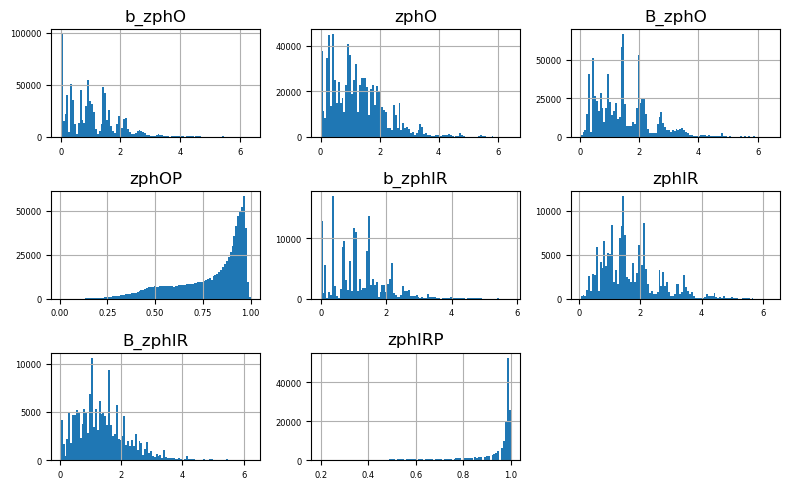

In [54]:
catalog.hist(column=photz.tolist(), bins=100, xlabelsize=6, ylabelsize=6, figsize=(8,5))
plt.tight_layout()

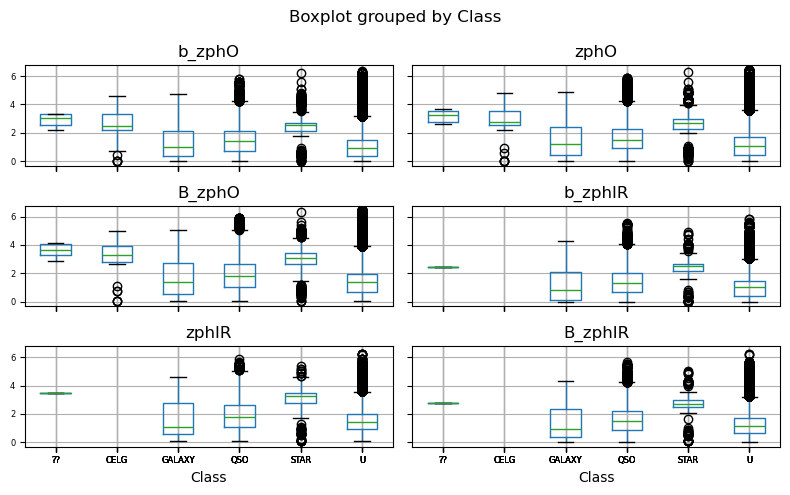

In [55]:
catalog.boxplot(column=photz[[0,1,2,4,5,6]].tolist(), by="Class", fontsize=6, figsize=(8,5))
plt.tight_layout()

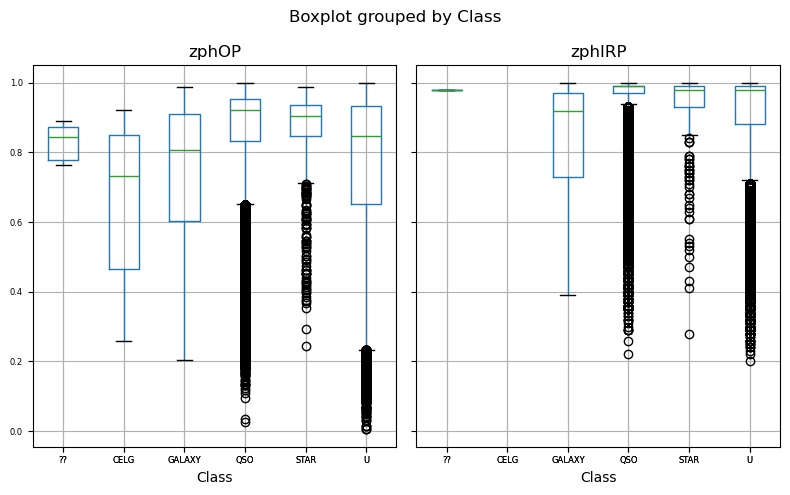

In [56]:
catalog.boxplot(column=photz[[3,7]].tolist(), by="Class", fontsize=6, figsize=(8,5))
plt.tight_layout()

This looks very nice now. The values zph take their place between the minimal values (small "b" letter in the beginning) and the maximum (capital "B"). Probabilities (capital "P" at the end) look correct too.

In the end of outliers removal, let's check counts in each spectral class.

In [57]:
catalog["Class"].value_counts()

U         733669
QSO       150443
STAR         743
GALAXY       557
CELG          32
??             5
Name: Class, dtype: int64

# FEATURE ENGINEERING (P. 1)

## Color variables

Let's define colors, which in astrophysics are differences of pairs of magnitudes. They're usually used as features for many targets.

In [58]:
catalog["u-g"] = catalog["umag"]-catalog["gmag"]
catalog["g-r"] = catalog["gmag"]-catalog["rmag"]
catalog["r-i"] = catalog["rmag"]-catalog["imag"]
catalog["i-z"] = catalog["imag"]-catalog["zmag"]
catalog["z-3.6"] = catalog["zmag"]-catalog["3.6mag"]
catalog["3.6-4.5"] = catalog["3.6mag"]-catalog["4.5mag"]
catalog["e_u-g"] = np.sqrt(catalog["e_umag"]**2+catalog["e_gmag"]**2)
catalog["e_g-r"] = np.sqrt(catalog["e_gmag"]**2+catalog["e_rmag"]**2)
catalog["e_r-i"] = np.sqrt(catalog["e_rmag"]**2+catalog["e_imag"]**2)
catalog["e_i-z"] = np.sqrt(catalog["e_imag"]**2+catalog["e_zmag"]**2)
catalog["e_z-3.6"] = np.sqrt(catalog["e_zmag"]**2+catalog["e_3.6mag"]**2)
catalog["e_3.6-4.5"] = np.sqrt(catalog["e_3.6mag"]**2+catalog["e_4.5mag"]**2)

In [59]:
color_all = catalog.columns[-12:]
color = color_all[:6]
e_color = color_all[6:]

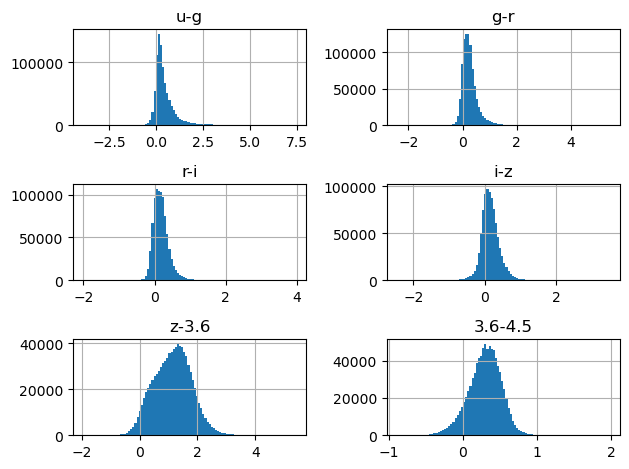

In [60]:
catalog.hist(column=color, bins=100)
plt.tight_layout()

<Axes: >

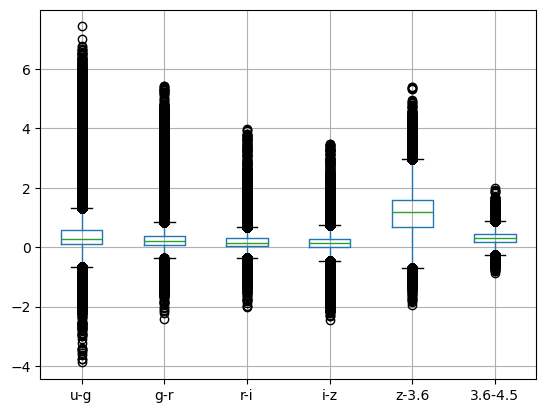

In [61]:
catalog.boxplot(column=color.tolist())

In [62]:
catalog.skew(numeric_only=True)[color_all]

u-g           2.728076
g-r           2.881182
r-i           1.628112
i-z           0.393644
z-3.6         0.107150
3.6-4.5      -0.261799
e_u-g         4.491357
e_g-r        15.478200
e_r-i        18.244530
e_i-z         4.460905
e_z-3.6       3.895725
e_3.6-4.5     1.072137
dtype: float64

## Logarithm of colors

We can see, the first three colors are highly skewed, while the remaining three are symmetric. Let's then use the logarithm transformation for these skewed colors. Since they have also nonpositive values, we need to shift their values.

In [63]:
catalog[["u-g","g-r","r-i"]].min()

u-g   -3.881
g-r   -2.413
r-i   -1.997
dtype: float64

In [64]:
shift1 = 5 #3.8810028
catalog["log_u-g"] = np.sqrt(catalog["u-g"]+shift1)
catalog["log_u-g"].skew()

2.320945941212349

In [65]:
shift2 = 3.5 #2.413025
catalog["log_g-r"] = np.log(catalog["g-r"]+shift2)
catalog["log_g-r"].skew()

1.7936754718579033

In [66]:
shift3 = 3 #2.0
catalog["log_r-i"] = np.log(catalog["r-i"]+shift3)
catalog["log_r-i"].skew()

0.8902301739023037

In [67]:
catalog["e_log_u-g"] = catalog["e_u-g"]/(catalog["u-g"]+shift1) 
catalog["e_log_g-r"] = catalog["e_g-r"]/(catalog["g-r"]+shift2)
catalog["e_log_r-i"] = catalog["e_r-i"]/(catalog["r-i"]+shift3)

As can be seen, we can slightly fine-tune the skewness by manipulating the shift in each case. However, we can't minimize the skewness as much as we wish, because in that case, huge outliers emerge. Those outliers “balance” the skewness parameter, but it's not about fixing the real skewness.

In [68]:
log_color_all = catalog.columns[-6:]
log_color = log_color_all[:3]
e_log_color = log_color_all[3:]

In [69]:
catalog[log_color_all].describe()

log_u-g        log_g-r        log_r-i      e_log_u-g  \
count  885449.000000  885449.000000  885449.000000  885449.000000   
mean        2.329132       1.323966       1.155643       0.031022   
std         0.124742       0.078655       0.069827       0.038533   
min         1.057828       0.083422       0.002996       0.000799   
25%         2.256546       1.274245       1.108893       0.009950   
50%         2.295866       1.312379       1.149622       0.017505   
75%         2.363895       1.355577       1.191799       0.034814   
max         3.525479       2.190200       1.941185       2.032819   

           e_log_g-r      e_log_r-i  
count  885449.000000  885449.000000  
mean        0.017432       0.021718  
std         0.019694       0.023638  
min         0.000827       0.000888  
25%         0.008257       0.010225  
50%         0.012190       0.015773  
75%         0.019986       0.026166  
max         2.943942       4.198806

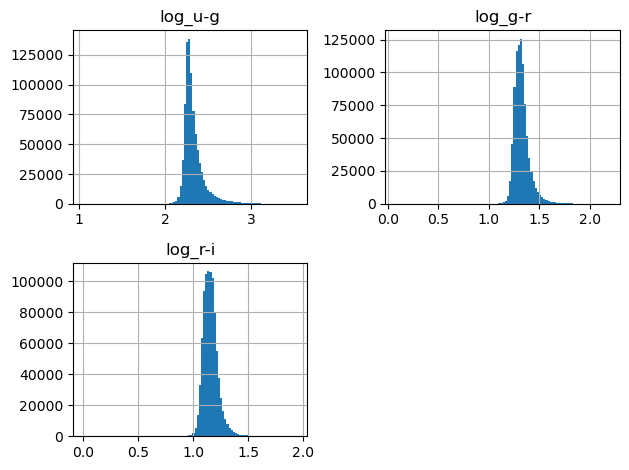

In [70]:
catalog.hist(column=log_color, bins=100)
plt.tight_layout()

<Axes: >

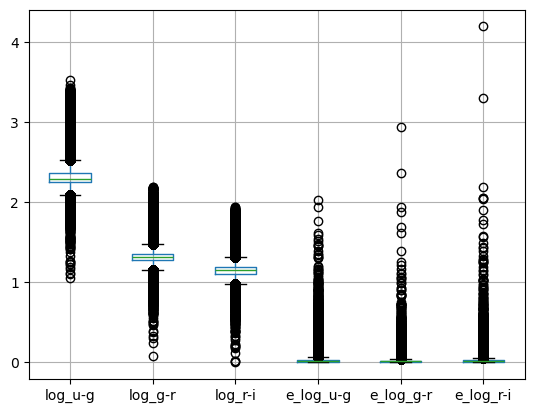

In [71]:
catalog.boxplot(column=log_color_all.tolist())

The logarithm transformation helped significantly only in the case of the g-r color making it moderately skewed. The r-i color got a large reduction of skewness but it's still strongly skewed. Similar for u-g.

# EXPLORATORY DATA ANALYSIS

## Checking linear correlations

Let's see the linear correlations of the features – first to the spectroscopic redshift zsp.

In [72]:
cat_corr = catalog.corr(numeric_only=True)

In [73]:
cat_corr_zsp = cat_corr["zsp"]
cat_corr_zsp[abs(cat_corr_zsp)>0.3].sort_values(ascending=False)

zsp          1.000000
zphIR        0.893668
B_zphIR      0.891974
b_zphIR      0.886584
B_zphO       0.844192
zphO         0.839556
b_zphO       0.837447
DB           0.605463
log_u-g      0.581646
u-g          0.576690
4.5mag       0.545794
3.6mag       0.543170
umag         0.479326
e_3.6-4.5    0.475917
e_4.5mag     0.471436
e_3.6mag     0.448185
NUV          0.432544
e_umag       0.408855
e_u-g        0.404235
FUV          0.399369
e_log_u-g    0.370550
e_NUV        0.340801
Kmag         0.308115
g-r          0.303769
e_F4.5      -0.309542
e_F3.6      -0.315189
F3.6        -0.327584
F4.5        -0.329465
z-3.6       -0.621717
Name: zsp, dtype: float64

Not surprising that the spectroscopic redshift is highly correlated with the photometric redshifts. There is a slightly better correlation with the photometric redshift zphIR, calculated with ugrizJHK magnitudes, than zphO, calculated only with ugriz magnitudes. There is also a correlation with the flag DB which indicates the redshift regime the source takes place in; no surprises here. Furthermore, we see a weak correlation with colors and magnitudes. Indeed, there is a dependency between colors and redshift which is nonlinear, though. From such correlations between different colors and spectroscopic redshift one can derive photometric redshift. Below, we take a quick look at zsp's correlation with magnitudes and colors.

In [74]:
cat_corr_zsp[mag.append(mag_oth)]

umag      0.479326
gmag      0.262470
rmag      0.190087
imag      0.173584
zmag      0.170176
3.6mag    0.543170
4.5mag    0.545794
Ymag      0.130537
Jmag      0.155436
Hmag      0.220714
Kmag      0.308115
FUV       0.399369
NUV       0.432544
Name: zsp, dtype: float64

In [75]:
cat_corr_zsp[color.append(log_color)]

u-g        0.576690
g-r        0.303769
r-i        0.108099
i-z        0.064376
z-3.6     -0.621717
3.6-4.5   -0.166008
log_u-g    0.581646
log_g-r    0.292006
log_r-i    0.105328
Name: zsp, dtype: float64

Now, let's check correlations for zphIR.

In [76]:
cat_corr_zphIR = cat_corr["zphIR"]
cat_corr_zphIR[abs(cat_corr_zphIR)>0.3].sort_values(ascending=False)

zphIR        1.000000
B_zphIR      0.986268
b_zphIR      0.973805
zsp          0.893668
B_zphO       0.880223
zphO         0.871738
b_zphO       0.869159
DB           0.492291
u-g          0.435915
log_u-g      0.432426
e_3.6-4.5    0.352333
3.6mag       0.342657
e_3.6mag     0.340531
e_4.5mag     0.340492
4.5mag       0.329965
z-3.6       -0.650278
Name: zphIR, dtype: float64

The situation is similar to the spectroscopic redshift zsp.

So far, we learned that there can be a chance to, for instance, find missing spectroscopic redshift (response variable) out of photometric redshift and/or color (predictior variables). Let's see if we can produce missing Vega/UV magnitudes from other parameters.

In [77]:
cat_corr_Jmag = cat_corr["Jmag"]
cat_corr_Jmag[abs(cat_corr_Jmag)>0.5].sort_values(ascending=False)

Jmag         1.000000
Hmag         0.938206
Ymag         0.934675
zmag         0.906846
Kmag         0.892697
imag         0.871637
e_Jmag       0.848343
rmag         0.824110
e_Ymag       0.768952
3.6mag       0.768889
e_Hmag       0.765941
4.5mag       0.746812
e_Kmag       0.745687
gmag         0.734118
FUV          0.632982
NUV          0.624565
e_3.6mag     0.592813
e_3.6-4.5    0.572863
e_z-3.6      0.570830
e_4.5mag     0.544962
umag         0.542779
e_Fg        -0.507624
e_F4.5      -0.518721
e_F3.6      -0.519786
F3.6        -0.541638
F4.5        -0.549491
Fu          -0.601334
Fg          -0.675745
Fr          -0.707923
Fi          -0.710488
Fz          -0.730865
Name: Jmag, dtype: float64

In [78]:
cat_corr_FUV = cat_corr["FUV"]
cat_corr_FUV[abs(cat_corr_FUV)>0.5].sort_values(ascending=False)

FUV          1.000000
NUV          0.832523
gmag         0.698665
umag         0.688098
rmag         0.671928
3.6mag       0.661585
zmag         0.660160
imag         0.657351
4.5mag       0.656807
Kmag         0.648810
Jmag         0.632982
Hmag         0.631884
Ymag         0.624505
e_Kmag       0.548078
e_Hmag       0.524843
e_3.6-4.5    0.517473
e_Ymag       0.517365
e_3.6mag     0.511756
e_Jmag       0.507904
e_4.5mag     0.505769
Fi          -0.533162
Fz          -0.541430
Fr          -0.560740
Fu          -0.576413
Fg          -0.584489
Name: FUV, dtype: float64

There is some correlation with other magnitudes, sometimes quite strong.

At last, proper motion of the object.

In [79]:
cat_corr_pm = cat_corr["pm"]
cat_corr_pm[abs(cat_corr_pm)>0.2].sort_values(ascending=False)

pm           1.000000
gmag         0.248630
rmag         0.242585
imag         0.233542
umag         0.229574
e_4.5mag     0.224093
zmag         0.223411
e_3.6-4.5    0.218521
4.5mag       0.213906
Ymag         0.207630
Name: pm, dtype: float64

Surprisingly, proper motions are weakly responsive to other variables. 

Finally, let's plot a heatmap of the all data correlations.

<Axes: >

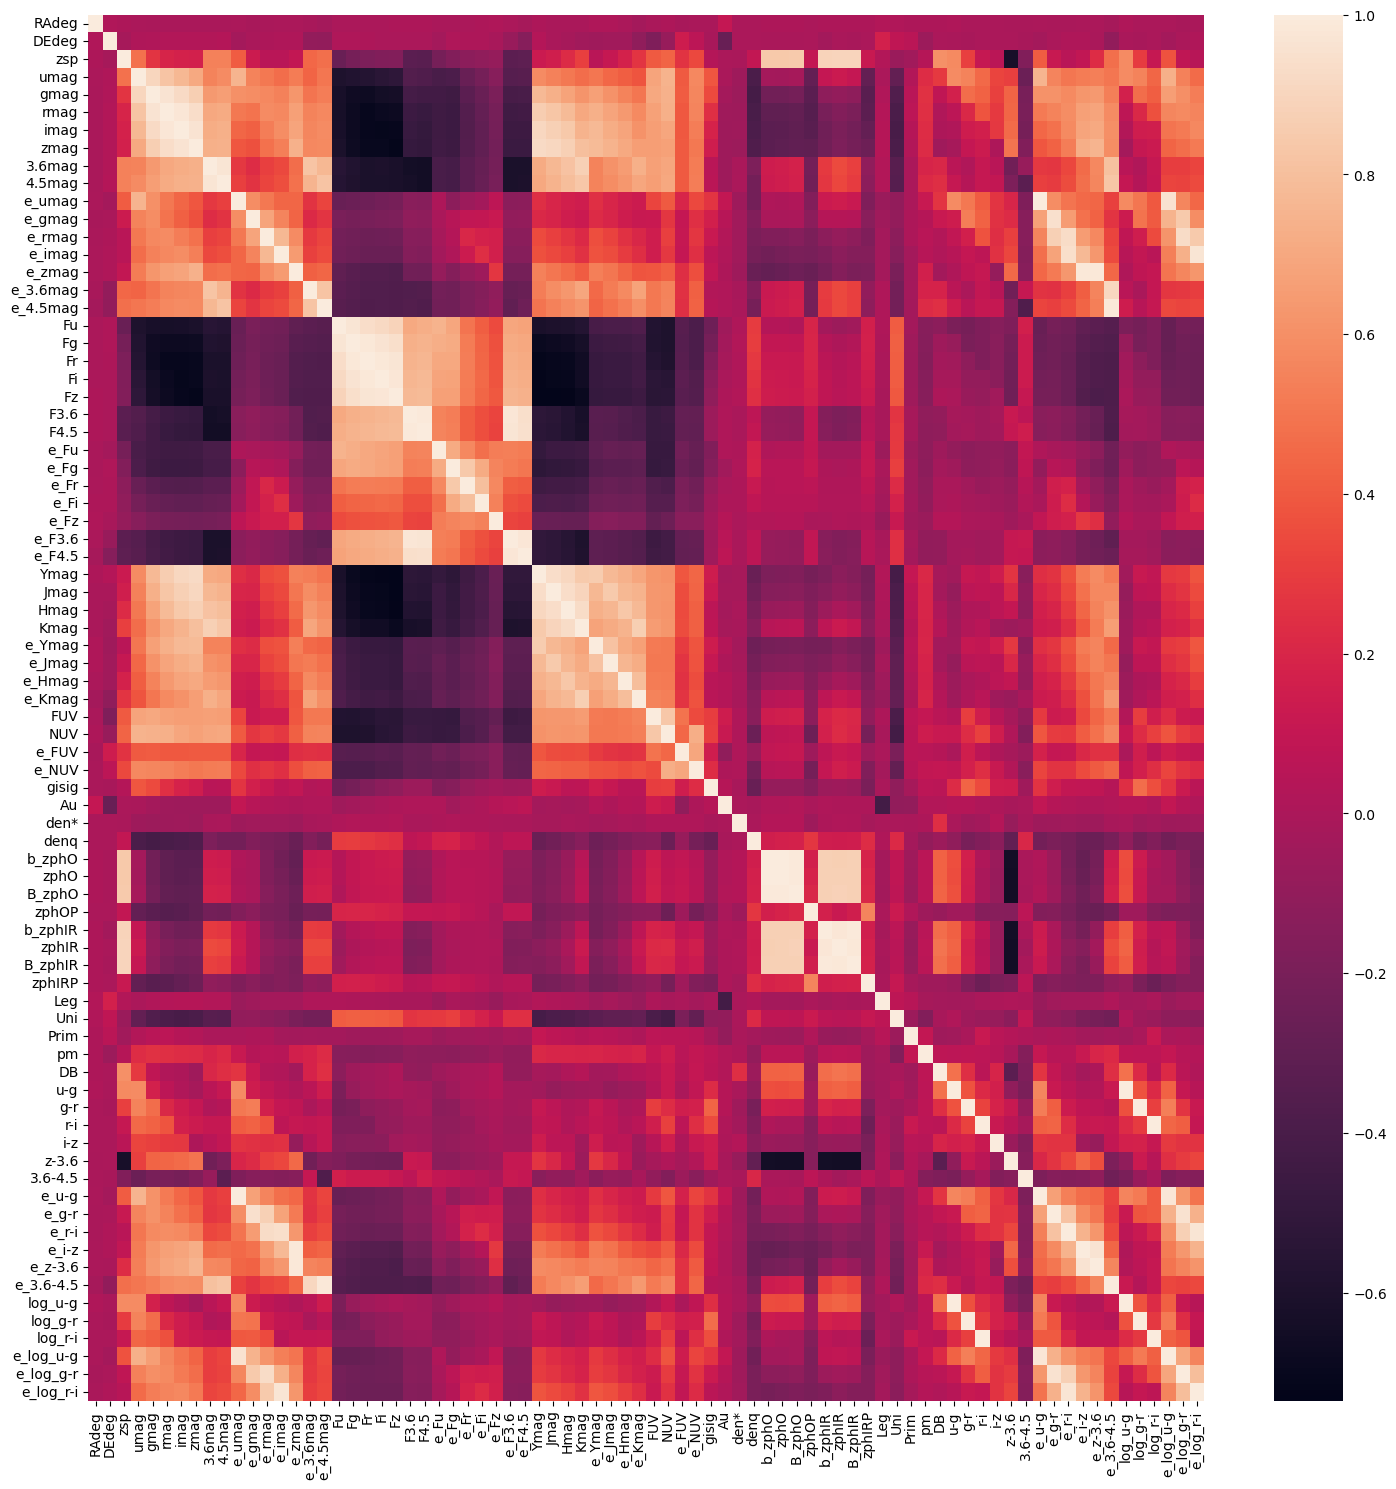

In [80]:
plt.figure(figsize=(18,18))
sns.heatmap(cat_corr)

## Scatter plots for main variables with all data

Let's check for further relationships between variables. We star with scatter plotting all the variables against spectroscopic redshift.

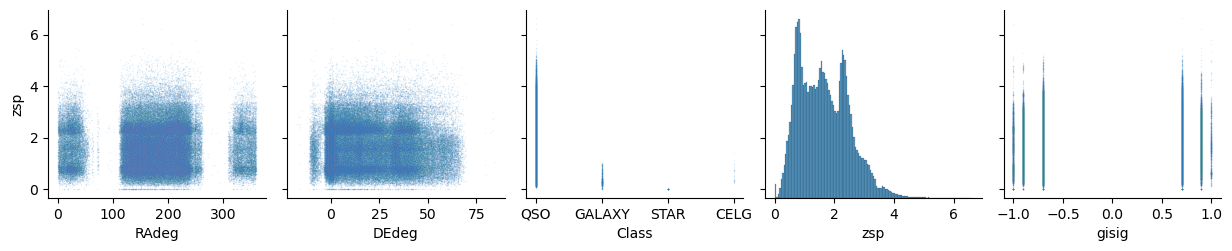

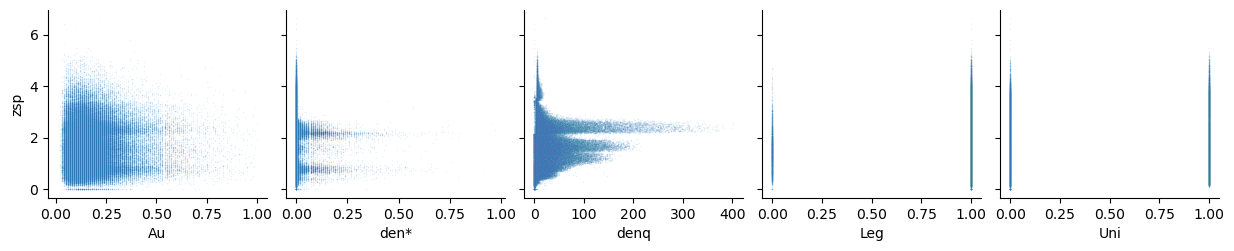

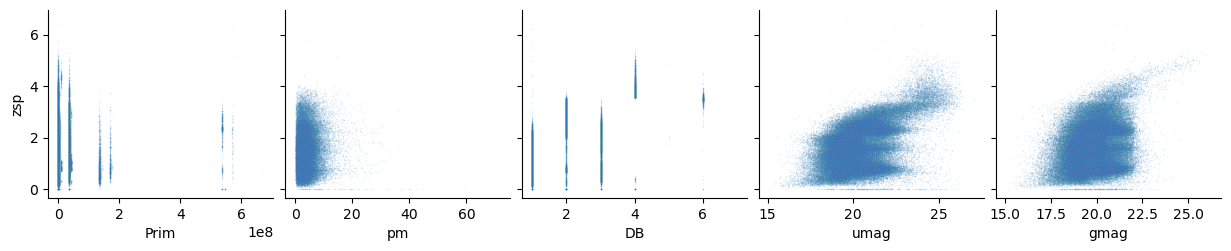

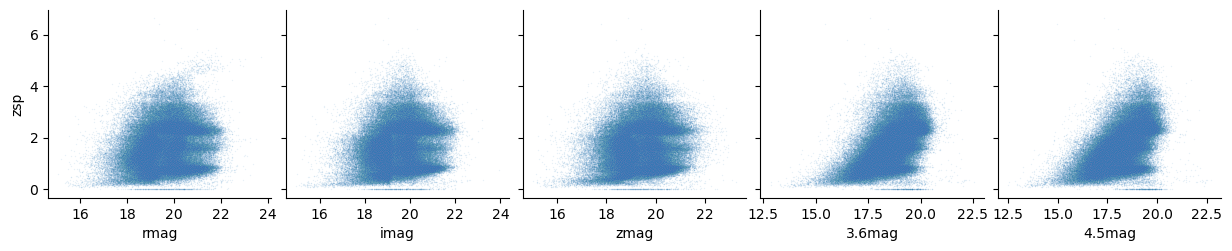

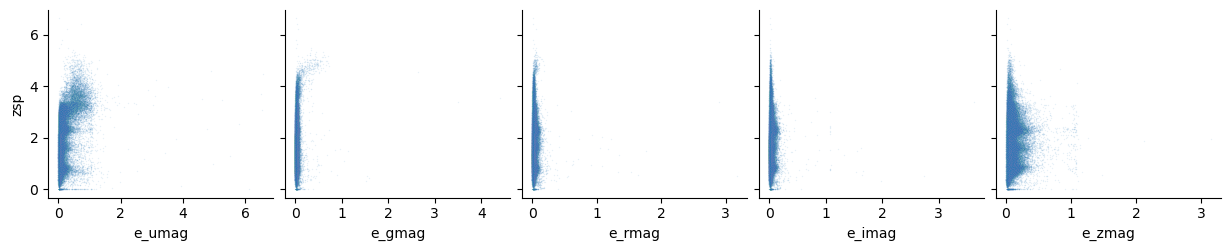

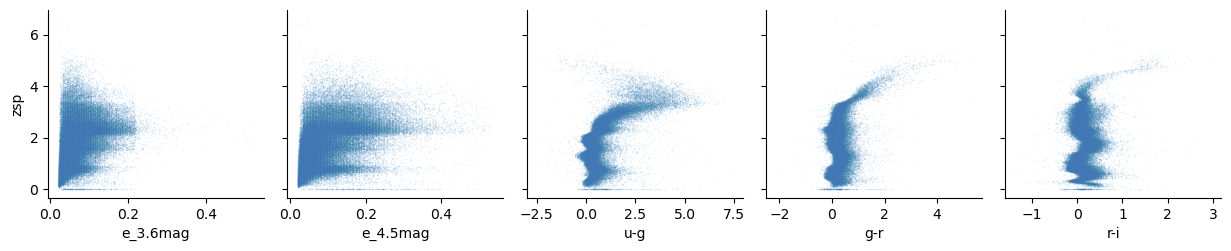

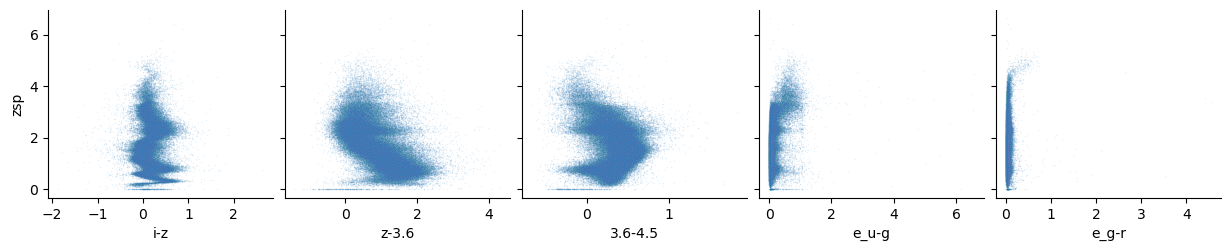

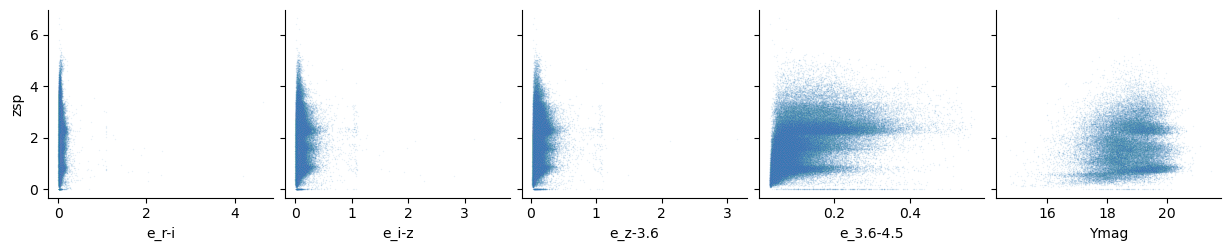

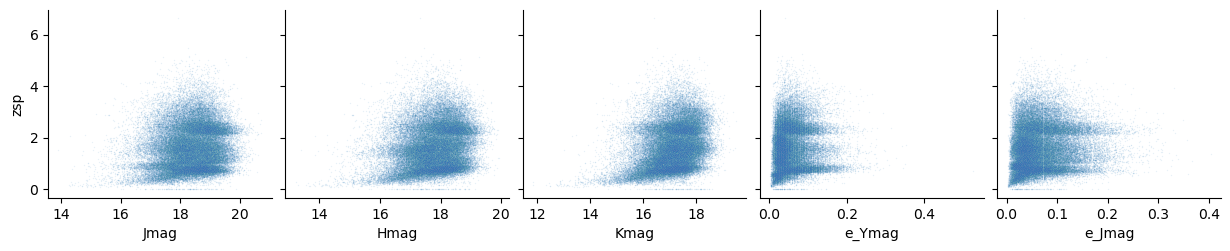

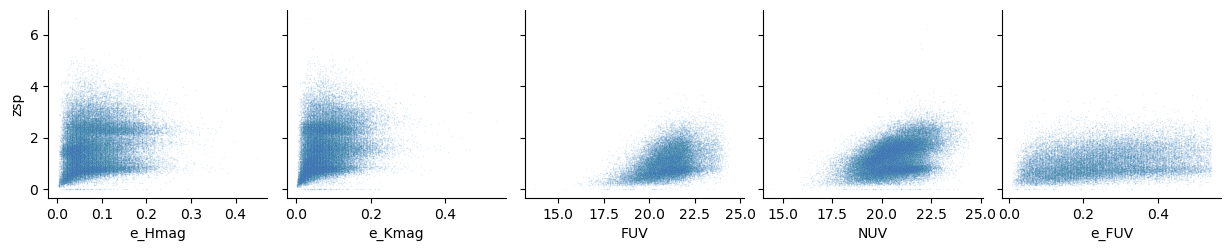

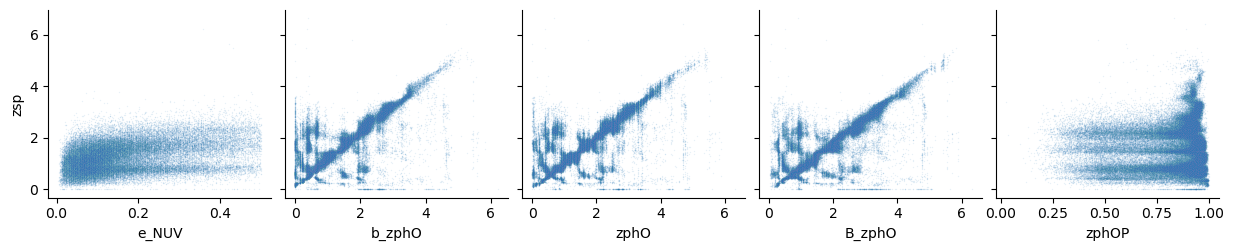

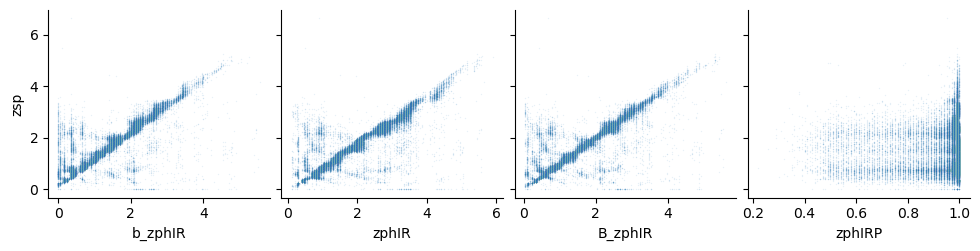

In [81]:
for i in range(0, len(basic.append([mag_all, color_all, mag_oth_all, photz])), 5):
    sns.pairplot(data=catalog,
                 x_vars=basic.append([mag_all, color_all, mag_oth_all, photz])[i:i+5],
                 y_vars="zsp",
                 plot_kws={"s": 1, "alpha": 0.1})

We can see here basic scatter of the points, without densities. Indeed, colors show more narrowly shaped relationship with redshift – better than magnitudes versus redshift. Also, a linear dependence of photometric and spectroscopic redshifts is visible. We need more detailed plots, showing densities of points. Let's make them for chosen variables.

In [82]:
cat_sample = catalog.sample(n=10000)

<Axes: xlabel='g-r', ylabel='i-z'>

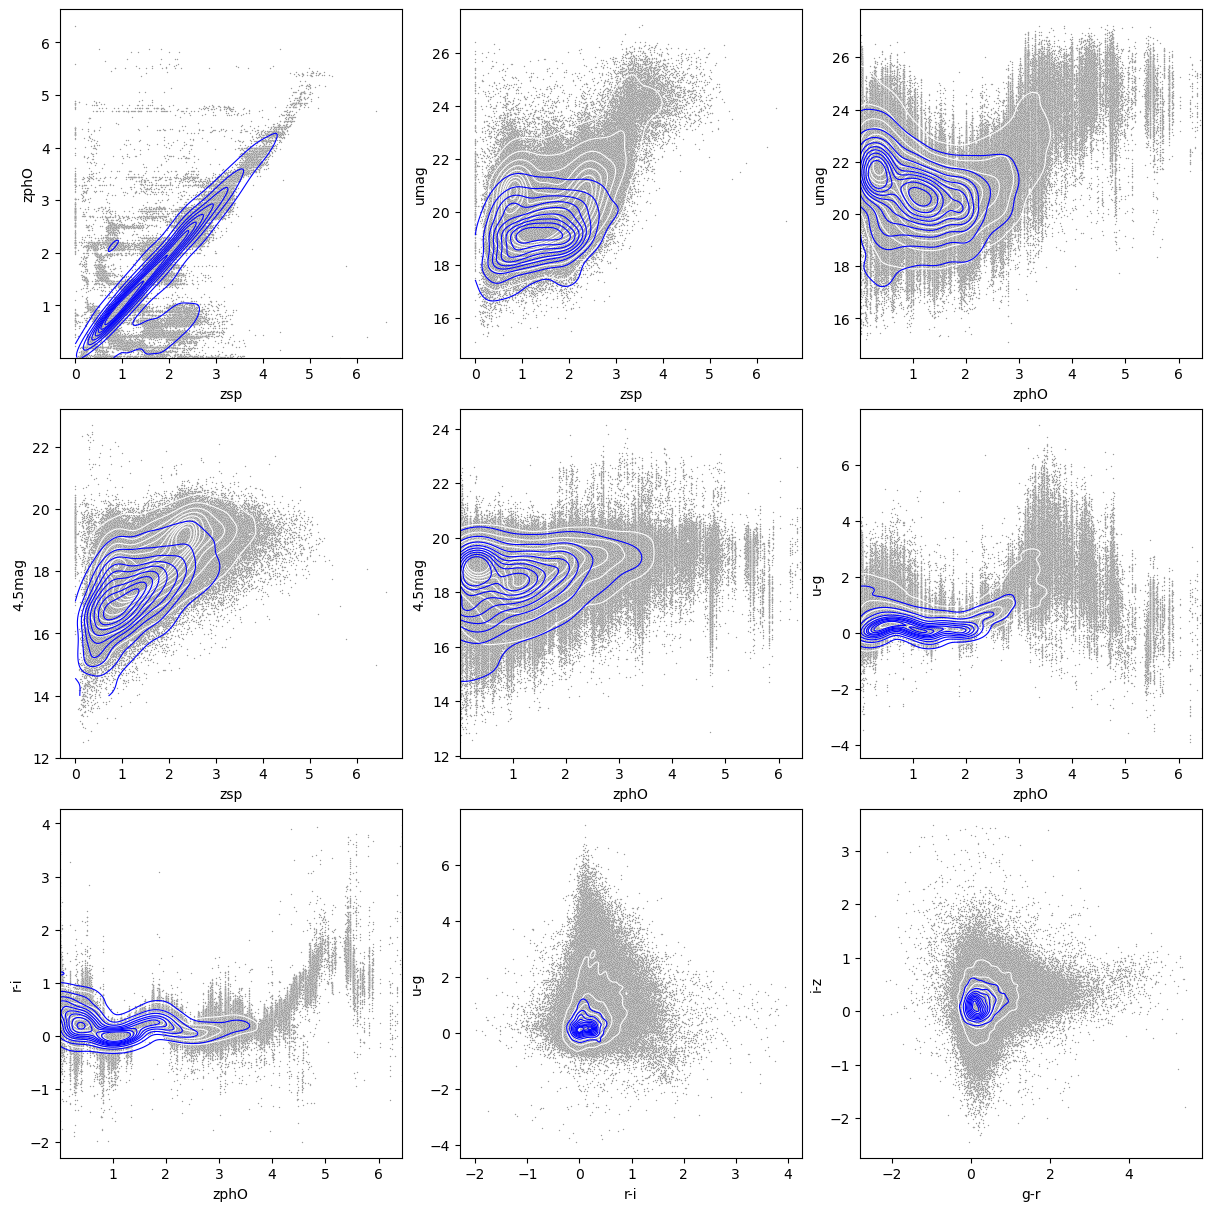

In [83]:
fig, axs = plt.subplots(3, 3, figsize=(12,12), layout="constrained")
# [0,0]: zphO vs. zsp
sns.scatterplot(ax=axs[0,0], data=catalog, x="zsp", y="zphO", s=1, color=".6")
sns.kdeplot(ax=axs[0,0], data=cat_sample, x="zsp", y="zphO", weights="zphOP", cut=0, linewidths=0.8, color="b")
# [0,1]: umag vs. zsp
sns.scatterplot(ax=axs[0,1], data=catalog, x="zsp", y="umag", s=1, color=".6")
sns.kdeplot(ax=axs[0,1], data=cat_sample, x="zsp", y="umag", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[0,1], data=cat_sample, x="zsp", y="umag", weights=1/cat_sample["e_umag"]**2, cut=0, linewidths=0.8, color="b")
# [0,2]: umag vs. zphO
sns.scatterplot(ax=axs[0,2], data=catalog, x="zphO", y="umag", s=1, color=".6")
sns.kdeplot(ax=axs[0,2], data=cat_sample, x="zphO", y="umag", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[0,2], data=cat_sample, x="zphO", y="umag", weights=cat_sample["zphOP"]/(cat_sample["e_umag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), cut=0, linewidths=0.8, color="b")
# [1,0]: 4.5mag vs. zsp
sns.scatterplot(ax=axs[1,0], data=catalog, x="zsp", y="4.5mag", s=1, color=".6")
sns.kdeplot(ax=axs[1,0], data=cat_sample, x="zsp", y="4.5mag", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[1,0], data=cat_sample, x="zsp", y="4.5mag", weights=1/cat_sample["e_4.5mag"]**2, cut=0, linewidths=0.8, color="b")
# [1,1]: 4.5mag vs. zphO
sns.scatterplot(ax=axs[1,1], data=catalog, x="zphO", y="4.5mag", s=1, color=".6")
sns.kdeplot(ax=axs[1,1], data=cat_sample, x="zphO", y="4.5mag", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[1,1], data=cat_sample, x="zphO", y="4.5mag", weights=cat_sample["zphOP"]/(cat_sample["e_4.5mag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), cut=0, linewidths=0.8, color="b")
# [1,2]: u-g vs. zphO
sns.scatterplot(ax=axs[1,2], data=catalog, x="zphO", y="u-g", s=1, color=".6")
sns.kdeplot(ax=axs[1,2], data=cat_sample, x="zphO", y="u-g", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[1,2], data=cat_sample, x="zphO", y="u-g", weights=cat_sample["zphOP"]/(cat_sample["e_u-g"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), cut=0, linewidths=0.8, color="b")
# [2,0]: r-i vs. zphO
sns.scatterplot(ax=axs[2,0], data=catalog, x="zphO", y="r-i", s=1, color=".6")
sns.kdeplot(ax=axs[2,0], data=cat_sample, x="zphO", y="r-i", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[2,0], data=cat_sample, x="zphO", y="r-i", weights=cat_sample["zphOP"]/(cat_sample["e_r-i"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), cut=0, linewidths=0.8, color="b")
# [2,1]: u-g vs. r-i
sns.scatterplot(ax=axs[2,1], data=catalog, x="r-i", y="u-g", s=1, color=".6")
sns.kdeplot(ax=axs[2,1], data=cat_sample, x="r-i", y="u-g", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[2,1], data=cat_sample, x="r-i", y="u-g", weights=1/(cat_sample["e_r-i"]**2+cat_sample["e_u-g"]**2), cut=0, linewidths=0.8, color="b")
# [2,2]: g-r vs. i-z
sns.scatterplot(ax=axs[2,2], data=catalog, x="g-r", y="i-z", s=1, color=".6")
sns.kdeplot(ax=axs[2,2], data=cat_sample, x="g-r", y="i-z", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[2,2], data=cat_sample, x="g-r", y="i-z", weights=1/(cat_sample["e_g-r"]**2+cat_sample["e_i-z"]**2), cut=0, linewidths=0.8, color="b")

Contour plots were made with a kernel density estimation algorithm for a small sample of the data in order to make the computations quicker. The white contours shows densities without taking weights into account, while the blue contours – with weights. Weights are inverses of errors squared, and if zphO was present – multiplied by probabilites of photometric redshift to fit within the given min-max range. In each plot, contours number is 10 (default) and the starting level is 5% of relative density (also default).

In the spectroscopic redshift vs. photometric redshift plot we can see the linear dependence plus outliers reported by Richards et al. (2015). In the color-redshift plots we can see a nonlinear dependence. The magnitude-redshift plots seem to be lees informative than the color-redshift plots, so we'll rule the former out in futher analysis. Moreover, the color-color diagrams may be helpful in futher classification analysis. I also checked plots with proper motions, but found nothing interesting there.

Finally, let's check the relations of Vega and UV magnitudes versus standard magnitudes. We saw quite promising values for linear correlation coefficients, which could be useful given not all the sources have Vega and UV magnitudes measured.

<Axes: xlabel='4.5mag', ylabel='NUV'>

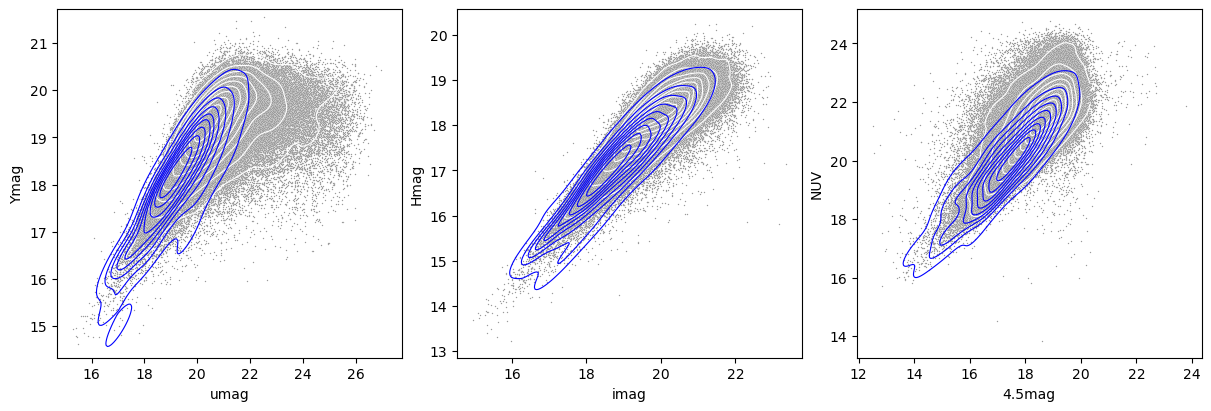

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), layout="constrained")
# [0]: umag vs. Ymag
sns.scatterplot(ax=axs[0], data=catalog, x="umag", y="Ymag", s=1, color=".6")
sns.kdeplot(ax=axs[0], data=cat_sample, x="umag", y="Ymag", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[0], data=cat_sample, x="umag", y="Ymag", weights=1/(cat_sample["e_Ymag"]**2+cat_sample["e_umag"]**2), linewidths=0.8, color="b")
# [1]: imag vs. Hmag
sns.scatterplot(ax=axs[1], data=catalog, x="imag", y="Hmag", s=1, color=".6")
sns.kdeplot(ax=axs[1], data=cat_sample, x="imag", y="Hmag", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[1], data=cat_sample, x="imag", y="Hmag", weights=1/(cat_sample["e_imag"]**2+cat_sample["e_Hmag"]**2), linewidths=0.8, color="b")
# [2]: 4.5mag vs. NUV
sns.scatterplot(ax=axs[2], data=catalog, x="4.5mag", y="NUV", s=1, color=".6")
sns.kdeplot(ax=axs[2], data=cat_sample, x="4.5mag", y="NUV", cut=0, linewidths=0.8, color="w")
sns.kdeplot(ax=axs[2], data=cat_sample, x="4.5mag", y="NUV", weights=1/(cat_sample["e_4.5mag"]**2+cat_sample["e_NUV"]**2), linewidths=0.8, color="b")

There are nice linear relations in the sample we plotted, especially when weights are taken into account. This can be utilized in the future for finding missing magnitudes from linear regression.

## Robust subset analysis

### Filtering objects

We will continue our analysis for the robust subset of the data, as defined by Richards et al. (2015). Namely, “robust” candidates are those which satisfy:
1. zphOP > 0.8 and
2. abs(gisig) <= 0.95.

For high-z candidates, 3.5<z<5 (z higher than 5.5 require additional care; maybe 5.5 as the limit?), we further restrict most robust sources to:<br>
3. NUV and FUV is NA, i.e., nondetections in GALEX (real high-z quasars are unlikely to be detected), and<br>
4. imag<22 (22nd magnitude point-like objects have a significant probability of being galaxies at these redshifts).

We mark robust sources with a new boolean column "robust".

In [85]:
low_z = (catalog["zphO"]>=0.0) & (catalog["zphO"]<2.2)
mid_z = (catalog["zphO"]>=2.2) & (catalog["zphO"]<3.5)
high_z = (catalog["zphO"]>=3.5) & (catalog["zphO"]<5.0)

In [86]:
catalog["robust"] = ((catalog["zphOP"]>0.8) &
                     (abs(catalog["gisig"])<=0.95) &
                     (low_z | mid_z | high_z &
                      catalog["NUV"].isna() & catalog["FUV"].isna() &
                      (catalog["imag"]<22)))

In [87]:
robust = catalog["robust"]
catalog[robust]

RAdeg      DEdeg Class  zsp    umag    gmag    rmag    imag  \
0         0.000629  35.517841     U  NaN  18.571  18.330  18.197  18.241   
1         0.000831  15.197328     U  NaN  22.647  21.808  20.873  20.615   
3         0.001914   9.385637     U  NaN  18.395  18.375  18.299  18.178   
4         0.002595  31.328981     U  NaN  19.592  19.431  19.425  19.285   
10        0.004221   8.072929     U  NaN  20.211  19.966  19.744  19.761   
...            ...        ...   ...  ...     ...     ...     ...     ...   
885493  359.998535  -0.655884     U  NaN  22.588  22.578  22.129  21.805   
885494  359.998535  -4.677128     U  NaN  21.067  21.113  20.809  20.739   
885495  359.998779   8.751452     U  NaN  19.727  19.209  18.894  18.768   
885499  359.999115   1.647538     U  NaN  20.256  20.296  19.944  19.722   
885502  359.999756  20.721079     U  NaN  20.086  20.126  20.110  19.909   

          zmag  3.6mag  ...     e_i-z   e_z-3.6  e_3.6-4.5   log_u-g  \
0       18.089  17.119  ...  0.016643  0.033106   0.043139  2.289323   
1       20.326  18.845  ...  0.109481  0.121433   0.104623  2.416402   
3       18.004  17.888  ...  0.033422  0.046957   0.060828  2.240536   
4       18.907  18.903  ...  0.036715  0.068000   0.100000  2.271783   
10      19.609  17.931  ...  0.041231  0.056639   0.061555  2.290196   
...        ...     ...  ...       ...       ...        ...       ...   
885493  21.753  19.871  ...  0.186601  0.228954   0.279029  2.238303   
885494  20.662  19.510  ...  0.176377  0.208665   0.195064  2.225758   
885495  18.607  18.430  ...  0.048765  0.066708   0.078746  2.349042   
885499  19.793  18.962  ...  0.094578  0.119004   0.128226  2.227106   
885502  19.770  19.520  ...  0.112606  0.148499   0.190830  2.227106   

         log_g-r   log_r-i  e_log_u-g  e_log_g-r  e_log_r-i  robust  
0       1.290059  1.083837   0.003077   0.003114   0.004074    True  
1       1.489528  1.181114   0.034162   0.011258   0.012618    True  
3       1.274245  1.138153   0.008060   0.010024   0.010132    True  
4       1.254476  1.144223   0.005552   0.005449   0.007071    True  
10      1.314261  1.092930   0.006659   0.004954   0.006705    True  
...          ...       ...        ...        ...        ...     ...  
885493  1.373462  1.201169   0.029802   0.020413   0.024039    True  
885494  1.336053  1.121678   0.019006   0.013761   0.019687    True  
885495  1.338941  1.139754   0.014849   0.010396   0.010182    True  
885499  1.348592  1.170002   0.013592   0.011378   0.012603    True  
885502  1.257324  1.163463   0.014041   0.011107   0.015125    True  

[516169 rows x 80 columns]

Let's see the number of objects of each type in the above redshift ranges.

In [88]:
vc_low = catalog[robust & low_z].value_counts(subset="Class")
vc_mid = catalog[robust & mid_z].value_counts(subset="Class")
vc_high = catalog[robust & high_z].value_counts(subset="Class")
vc_all = catalog[robust].value_counts(subset="Class")
pd.DataFrame(data={"low z": vc_low,
                   "mid z": vc_mid,
                   "high z": vc_high,
                   "all": vc_all}).fillna(0).astype(np.uint32)

low z  mid z  high z     all
Class                                
??           0      1       0       1
CELG         1      4       1       6
GALAXY     164     53      28     245
QSO      78736  32246    2975  113957
STAR        73    339      48     460
U       345490  48152    7858  401500

There are still some contaminants (proven stars and galaxies, as well as one “spectrally weird” object (??)) in the robust subset. There's a few of them, but we we'll remove the robust flag for them.

In [89]:
contamin = catalog["Class"].isin(["??", "CELG","GALAXY","STAR"])
catalog["robust_contamin"] = robust & contamin
catalog.loc[robust & contamin, "robust"] = False
# robust = catalog["robust"] -- the robust mask isn't a deep copy of
# the catalog's "robust" column so all the changes in this column will
# be reflected in the mask.

In [90]:
vc_low = catalog.loc[robust & low_z, "Class"].value_counts()
vc_mid = catalog.loc[robust & mid_z, "Class"].value_counts()
vc_high = catalog.loc[robust & high_z, "Class"].value_counts()
vc_all = catalog.loc[robust, "Class"].value_counts()
pd.DataFrame(data={"low z": vc_low,
                   "mid z": vc_mid,
                   "high z": vc_high,
                   "all": vc_all}).fillna(0).astype(np.uint32)

low z  mid z  high z     all
U    345490  48152    7858  401500
QSO   78736  32246    2975  113957

In [91]:
robust_contamin = catalog["robust_contamin"]
catalog[robust_contamin]

RAdeg     DEdeg   Class      zsp    umag    gmag    rmag    imag  \
5196      1.562334 -9.054619  GALAXY  0.42958  19.715  19.593  19.468  19.136   
6582      1.983486  5.956529    STAR  0.00014  20.797  20.347  20.366  19.957   
10544     3.190868 -1.089458    STAR      NaN  23.334  21.039  19.489  19.007   
16159     4.871462 -2.027376  GALAXY  0.62237  21.643  21.192  20.789  20.422   
21631     6.307746 -0.749873    STAR      NaN  19.353  18.482  18.241  18.191   
...            ...       ...     ...      ...     ...     ...     ...     ...   
864919  353.954773  0.220779  GALAXY  0.13498  20.193  20.111  19.885  19.879   
865128  354.025208  8.563114    STAR      NaN  20.437  19.644  19.268  19.175   
866560  354.458221  3.447956    STAR      NaN  21.399  20.452  20.294  20.298   
873900  356.676788 -0.025076    STAR      NaN  20.338  19.471  19.224  19.142   
883401  359.363892  4.284453    STAR  0.00006  21.028  20.427  20.538  20.420   

          zmag  3.6mag  ...   e_z-3.6  e_3.6-4.5   log_u-g   log_g-r  \
5196    19.225  19.344  ...  0.113146   0.175071  2.263184  1.287854   
6582    19.421  19.575  ...  0.127413   0.321922  2.334524  1.247320   
10544   18.777  18.712  ...  0.058249   0.146540  2.700926  1.619388   
16159   19.992  18.615  ...  0.090907   0.113018  2.334738  1.361745   
21631   18.213  17.290  ...  0.034886   0.056303  2.423015  1.319353   
...        ...     ...  ...       ...        ...       ...       ...   
864919  20.168  19.873  ...  0.161409   0.265204  2.254329  1.315335   
865128  19.162  19.478  ...  0.119921   0.251796  2.406865  1.354804   
866560  20.062  19.418  ...  0.145836   0.253190  2.438647  1.296917   
873900  19.143  19.208  ...  0.104561   0.285246  2.422189  1.320956   
883401  19.625  19.895  ...  0.177654   0.339912  2.366643  1.220535   

         log_r-i  e_log_u-g  e_log_g-r  e_log_r-i  robust  robust_contamin  
5196    1.203573   0.006985   0.006242   0.007006   False             True  
6582    1.226419   0.018981   0.013684   0.015143   False             True  
10544   1.247607   0.029526   0.002835   0.002648   False             True  
16159   1.214022   0.019783   0.011646   0.012392   False             True  
21631   1.115142   0.002079   0.002646   0.004002   False             True  
...          ...        ...        ...        ...     ...              ...  
864919  1.100610   0.002640   0.002096   0.002862   False             True  
865128  1.129141   0.007920   0.004564   0.005720   False             True  
866560  1.097278   0.021982   0.011420   0.015223   False             True  
873900  1.125579   0.003073   0.002461   0.003449   False             True  
883401  1.137192   0.021783   0.014243   0.019184   False             True  

[712 rows x 81 columns]

### Distribution of features

Okay. We're ready to reproduce some of the above plots for the robust subsample. Let's start with redshifts.

Text(0.5, 0.98, 'Redshift for the robust subsample')

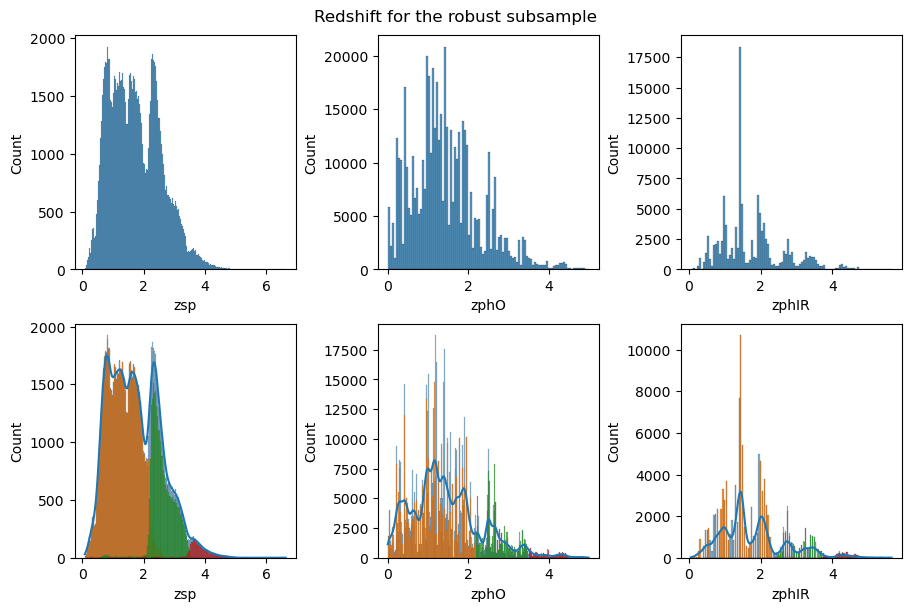

In [92]:
fig, axs = plt.subplots(2, 3, figsize=(9,6), layout="constrained")
# upper row
sns.histplot(ax=axs[0,0], x=catalog.loc[robust, "zsp"], bins=200)
sns.histplot(ax=axs[0,1], x=catalog.loc[robust, "zphO"], bins=100)
sns.histplot(ax=axs[0,2], x=catalog.loc[robust, "zphIR"], bins=100)
#lower left
sns.histplot(ax=axs[1,0], x=catalog.loc[robust, "zsp"], bins=200, kde=True)
sns.histplot(ax=axs[1,0], x=catalog.loc[robust & low_z, "zsp"], bins=200)
sns.histplot(ax=axs[1,0], x=catalog.loc[robust & mid_z, "zsp"], bins=133)
sns.histplot(ax=axs[1,0], x=catalog.loc[robust & high_z, "zsp"], bins=166)
#lower middle
sns.histplot(ax=axs[1,1], x=catalog.loc[robust, "zphO"], bins=200, kde=True)
sns.histplot(ax=axs[1,1], x=catalog.loc[robust & low_z, "zphO"], bins=100)
sns.histplot(ax=axs[1,1], x=catalog.loc[robust & mid_z, "zphO"], bins=50)
sns.histplot(ax=axs[1,1], x=catalog.loc[robust & high_z, "zphO"], bins=50)
#lower right
sns.histplot(ax=axs[1,2], x=catalog.loc[robust, "zphIR"], bins=200, kde=True)
sns.histplot(ax=axs[1,2], x=catalog.loc[robust & low_z, "zphIR"], bins=200)
sns.histplot(ax=axs[1,2], x=catalog.loc[robust & mid_z, "zphIR"], bins=200)
sns.histplot(ax=axs[1,2], x=catalog.loc[robust & high_z, "zphIR"], bins=100)
fig.suptitle("Redshift for the robust subsample")

The spectroscopic redshift revealed a new peak (second from the left at z~=1), and the photometric redshift are still shredded. The differences in height of some columns (as in the green, mid-z part of zsp histogram with respect to the blue, general zsp histogram) take place probably because of the bin numbers mismatch.

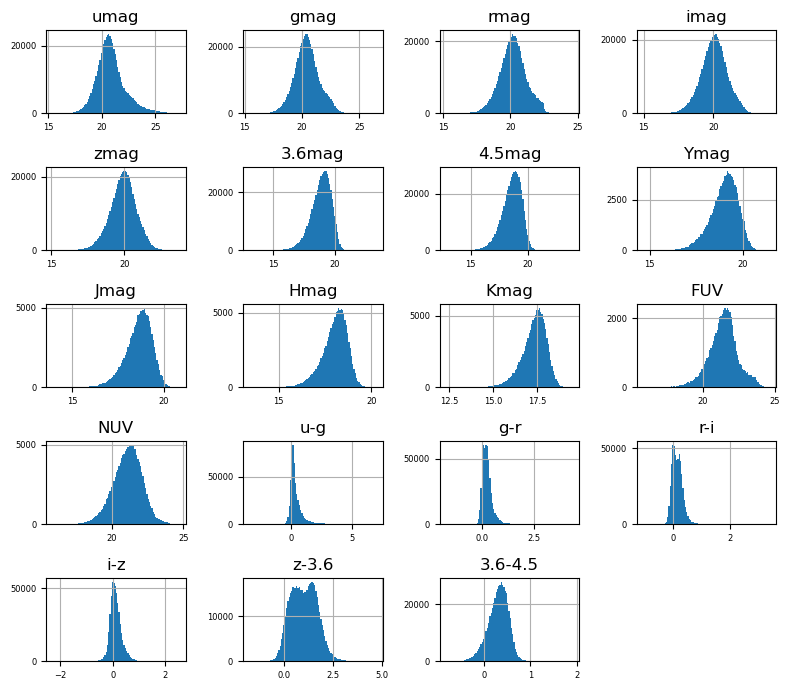

In [93]:
catalog[robust].hist(column=mag.append([mag_oth, color]).tolist(),
                     bins=100, xlabelsize=6, ylabelsize=6, figsize=(8,7))
plt.tight_layout()

In [94]:
np.abs(catalog.loc[robust, mag_all].skew(numeric_only=True))-np.abs(catalog[mag_all].skew(numeric_only=True))

umag         0.260895
gmag         0.143217
rmag        -0.208207
imag        -0.215222
zmag        -0.145929
3.6mag      -0.094836
4.5mag      -0.099318
e_umag       0.982379
e_gmag      -4.456478
e_rmag     -12.718591
e_imag      -6.968631
e_zmag       0.198373
e_3.6mag     0.113892
e_4.5mag     0.170444
dtype: float64

In [95]:
np.abs(catalog.loc[robust, mag_oth_all].skew(numeric_only=True))-np.abs(catalog[mag_oth_all].skew(numeric_only=True))

Ymag     -0.075957
Jmag     -0.076264
Hmag     -0.081667
Kmag     -0.096873
e_Ymag    0.115507
e_Jmag    0.095533
e_Hmag    0.074808
e_Kmag    0.052026
FUV      -0.129615
NUV      -0.119192
e_FUV    -0.014586
e_NUV     0.143177
dtype: float64

In [96]:
np.abs(catalog.loc[robust, color_all].skew(numeric_only=True))-np.abs(catalog[color_all].skew(numeric_only=True))

u-g          0.276468
g-r         -0.023630
r-i         -0.568500
i-z          0.090789
z-3.6        0.078687
3.6-4.5      0.126217
e_u-g        0.841292
e_g-r       -5.999154
e_r-i       -8.200307
e_i-z       -0.279515
e_z-3.6      0.077192
e_3.6-4.5    0.165025
dtype: float64

In [97]:
np.abs(catalog.loc[robust, photz].skew(numeric_only=True))-np.abs(catalog[photz].skew(numeric_only=True))

b_zphO    -0.358235
zphO      -0.298828
B_zphO    -0.230563
zphOP     -0.395151
b_zphIR   -0.199680
zphIR     -0.109452
B_zphIR   -0.160081
zphIRP     2.132299
dtype: float64

Robust subsample decrease skewness in most of the variables (getting the skewness parameter closer to zero). The actual values of skewness of photometric redshifts are

In [98]:
catalog.loc[robust, photz].skew(numeric_only=True)

b_zphO     0.812908
zphO       0.776906
B_zphO     0.810607
zphOP     -0.662302
b_zphIR    0.815608
zphIR      0.918063
B_zphIR    0.844577
zphIRP    -4.239491
dtype: float64

which is fair – moderately skewed.

### Visualizing filtered examples

Let's reproduce the plots with scatter points and kde densities. First, we check the differences in the scatter plots between all and robust sources.

<Axes: xlabel='g-r', ylabel='i-z'>

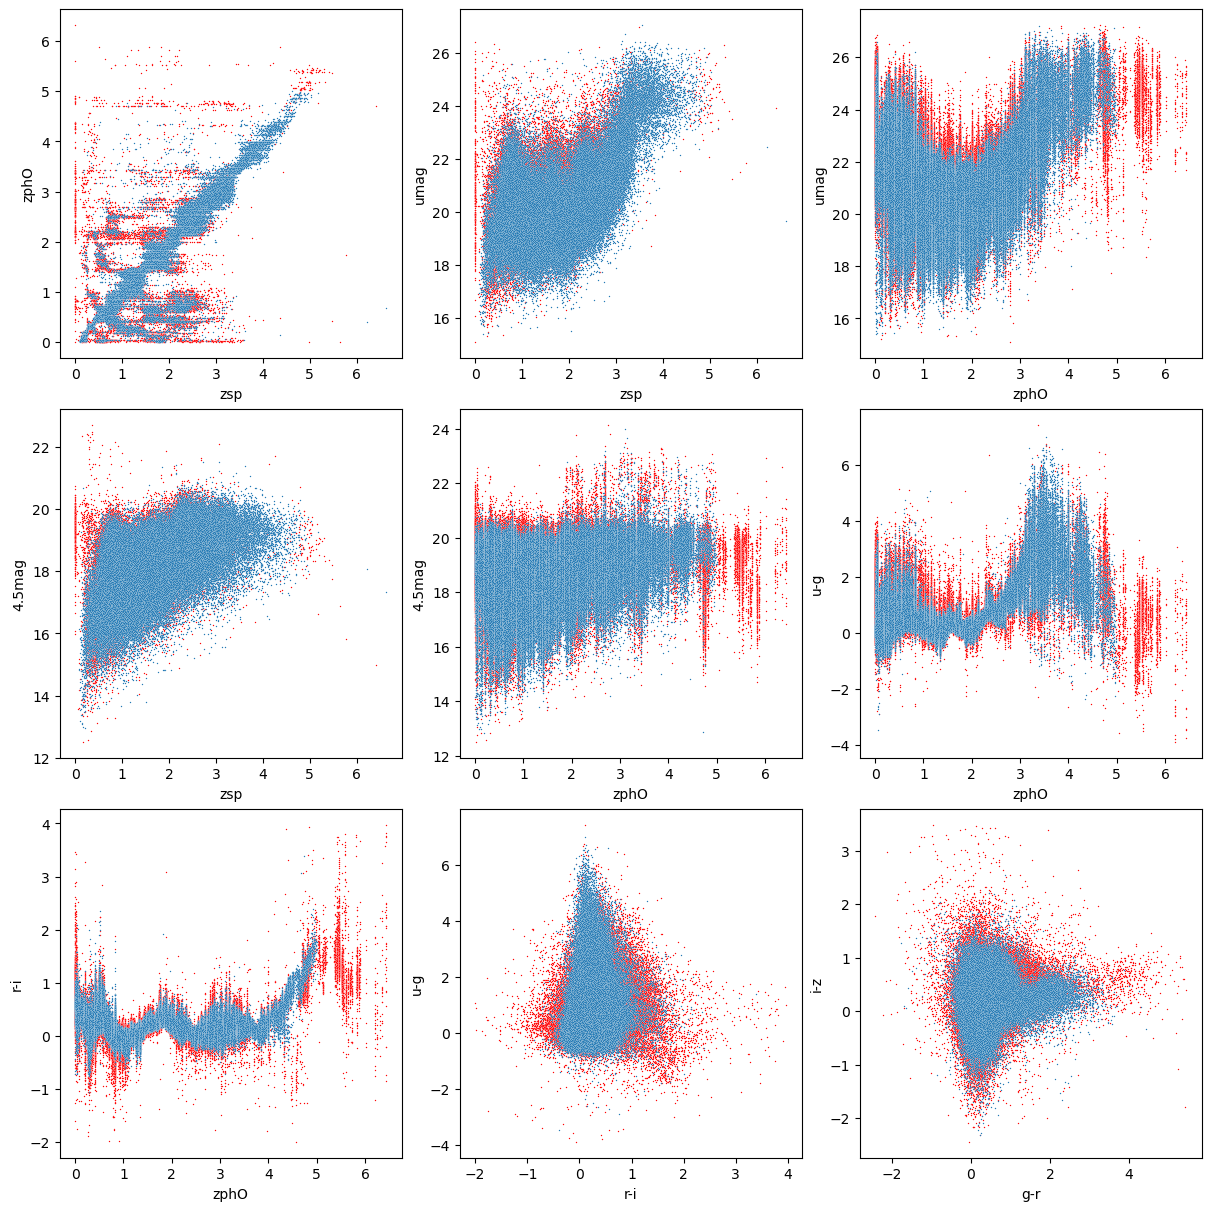

In [99]:
fig, axs = plt.subplots(3, 3, figsize=(12,12), layout="constrained")
# [0,0]: zphO vs. zsp
sns.scatterplot(ax=axs[0,0], data=catalog[~robust], x="zsp", y="zphO", s=1, color="r")
sns.scatterplot(ax=axs[0,0], data=catalog[robust], x="zsp", y="zphO", s=1, alpha=1)
# [0,1]: umag vs. zsp
sns.scatterplot(ax=axs[0,1], data=catalog[~robust], x="zsp", y="umag", s=1, color="r")
sns.scatterplot(ax=axs[0,1], data=catalog[robust], x="zsp", y="umag", s=1, alpha=1)
# [0,2]: umag vs. zphO
sns.scatterplot(ax=axs[0,2], data=catalog[~robust], x="zphO", y="umag", s=1, color="r")
sns.scatterplot(ax=axs[0,2], data=catalog[robust], x="zphO", y="umag", s=1)
# [1,0]: 4.5mag vs. zsp
sns.scatterplot(ax=axs[1,0], data=catalog[~robust], x="zsp", y="4.5mag", s=1, color="r")
sns.scatterplot(ax=axs[1,0], data=catalog[robust], x="zsp", y="4.5mag", s=1)
# [1,1]: 4.5mag vs. zphO
sns.scatterplot(ax=axs[1,1], data=catalog[~robust], x="zphO", y="4.5mag", s=1, color="r")
sns.scatterplot(ax=axs[1,1], data=catalog[robust], x="zphO", y="4.5mag", s=1)
# [1,2]: u-g vs. zphO
sns.scatterplot(ax=axs[1,2], data=catalog[~robust], x="zphO", y="u-g", s=1, color="r")
sns.scatterplot(ax=axs[1,2], data=catalog[robust], x="zphO", y="u-g", s=1)
# [2,0]: r-i vs. zphO
sns.scatterplot(ax=axs[2,0], data=catalog[~robust], x="zphO", y="r-i", s=1, color="r")
sns.scatterplot(ax=axs[2,0], data=catalog[robust], x="zphO", y="r-i", s=1)
# [2,1]: u-g vs. r-i
sns.scatterplot(ax=axs[2,1], data=catalog[~robust], x="r-i", y="u-g", s=1, color="r")
sns.scatterplot(ax=axs[2,1], data=catalog[robust], x="r-i", y="u-g", s=1)
# [2,2]: g-r vs. i-z
sns.scatterplot(ax=axs[2,2], data=catalog[~robust], x="g-r", y="i-z", s=1, color="r")
sns.scatterplot(ax=axs[2,2], data=catalog[robust], x="g-r", y="i-z", s=1)

We can see that our robustness criterium makes some of the relations less scattered.

### Spectroscopic-photometric redshift plot

In [100]:
cat_sample_robust = catalog[robust].sample(n=10000)
cat_sample_low_z = catalog[robust & low_z].sample(n=10000)
cat_sample_mid_z = catalog[robust & mid_z].sample(n=10000)

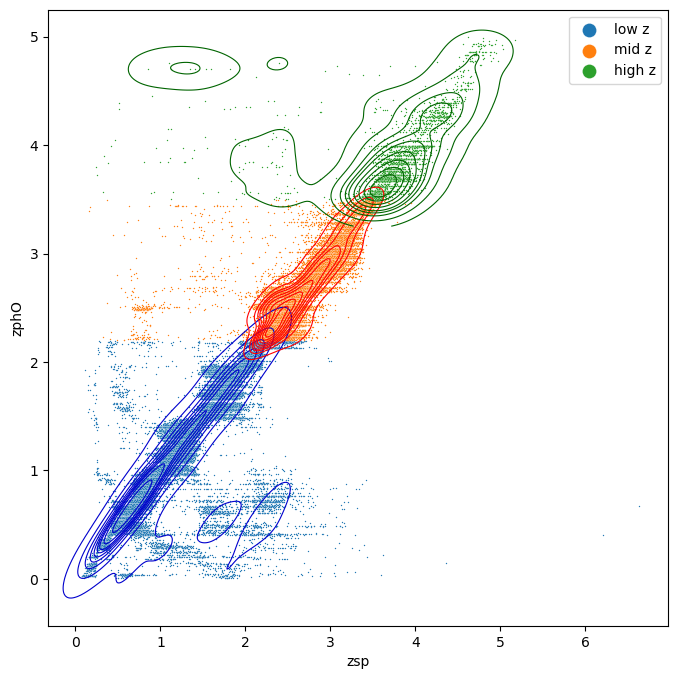

In [101]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=catalog[robust & low_z],
                x="zsp", y="zphO", s=1)
sns.scatterplot(data=catalog[robust & mid_z],
                x="zsp", y="zphO", s=1)
sns.scatterplot(data=catalog[robust & high_z],
                x="zsp", y="zphO", s=1)
sns.kdeplot(data=cat_sample_low_z, x="zsp", y="zphO", 
            weights=catalog["zphOP"]/(catalog["B_zphO"]-catalog["b_zphO"])**2, 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(data=cat_sample_mid_z, x="zsp", y="zphO",
            weights=catalog["zphOP"]/(catalog["B_zphO"]-catalog["b_zphO"])**2,
            linewidths=0.8, color="r")
sns.kdeplot(data=catalog[robust & high_z], x="zsp", y="zphO",
            weights=catalog["zphOP"]/(catalog["B_zphO"]-catalog["b_zphO"])**2,
            linewidths=0.8, color="darkgreen")
plt.legend(labels=["low z", "mid z", "high z"], markerscale=10)
plt.show()

Contours were drawn with weights being inversed and squared differences between max and min redshift values (b_zphO and B_zphO), multiplied by zphOP. We don't have information what kind of distribution zphOP describes. If it's gaussian, then we should multiply by the gaussian quantiles for given zphOP, in order to get the real weight of the points.

In [102]:
catalog.loc[robust, "zphO"].corr(catalog.loc[robust, "zsp"])

0.9423581600779234

In [103]:
catalog.loc[:, "zphO"].corr(catalog.loc[:, "zsp"])

0.8395564590880931

So, the correlation improves significantly for the robust subset.

### Magnitude-redshift plots

Now, we check the relation between magnitudes and photometric redshift.

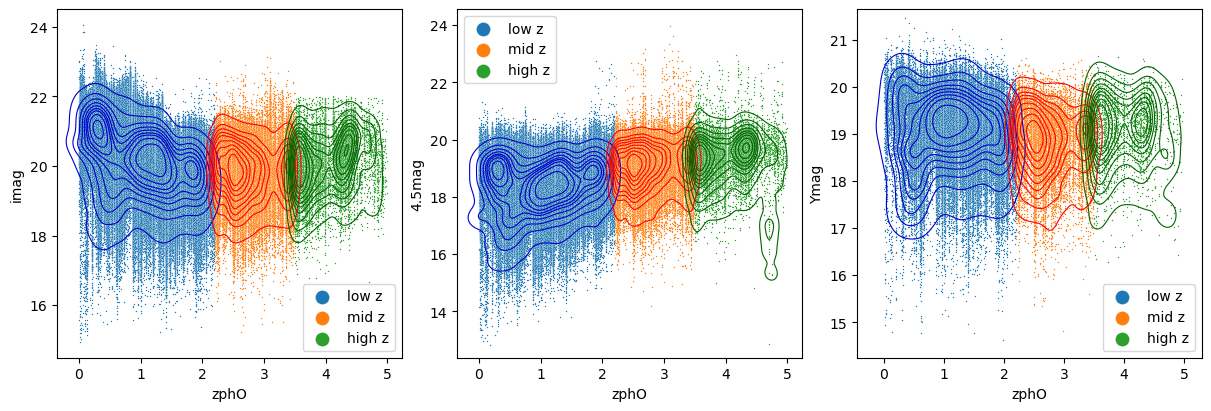

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), layout="constrained")

# [0] umag vs. zphO
iax = 0
xdata = "zphO"
ydata = "imag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_imag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_imag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_imag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="lower right")

# [1] 4.5mag vs. zphO
iax = 1
xdata = "zphO"
ydata = "4.5mag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_4.5mag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_4.5mag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_4.5mag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="upper left")

# [2] Ymag vs. zphO
iax = 2
xdata = "zphO"
ydata = "Ymag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_Ymag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_Ymag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog["e_Ymag"]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="lower right")


The relation is slightly blurred, although the most dense regions in the contour plots align to some nonlinear (quadratic) pattern.

### Color-redshift plots

Colors, i.e., the differences of magnitudes, are expected to form a narrower shape as plotted versus redshift. 

<Axes: xlabel='zphO', ylabel='3.6-4.5'>

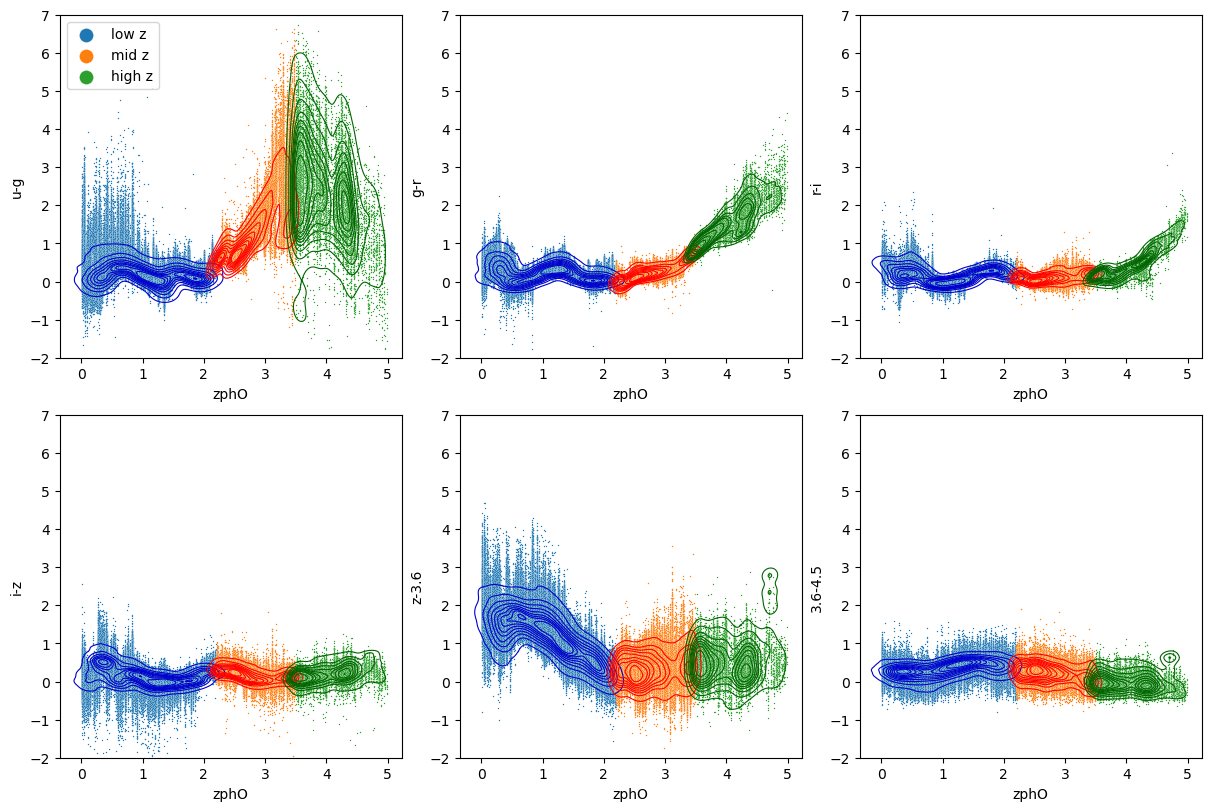

In [105]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), layout="constrained")
for ax in axs.flat:
    ax.set_ylim(-2,7)

iax = (0,0)
xdata = "zphO"
ydata = "u-g"
yerrdata = "e_u-g"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="upper left")

iax = (0,1)
xdata = "zphO"
ydata = "g-r"
yerrdata = "e_g-r"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="upper left")

iax = (0,2)
xdata = "zphO"
ydata = "r-i"
yerrdata = "e_r-i"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="upper left")

iax = (1,0)
xdata = "zphO"
ydata = "i-z"
yerrdata = "e_i-z"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="lower right")

iax = (1,1)
xdata = "zphO"
ydata = "z-3.6"
yerrdata = "e_z-3.6"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="lower right")

iax = (1,2)
xdata = "zphO"
ydata = "3.6-4.5"
yerrdata = "e_3.6-4.5"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=catalog["zphOP"]/(catalog[yerrdata]**2+(catalog["B_zphO"]-catalog["b_zphO"])**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="lower right")

As expected, in most cases, we get relatively strict relationships which we can fit polynomials for.

### Color-color plots

Color-color plots can provide separation of different regions on the plane varying by some parameters. Thus they provide a useful tool for classification.

<Axes: xlabel='g-r', ylabel='i-z'>

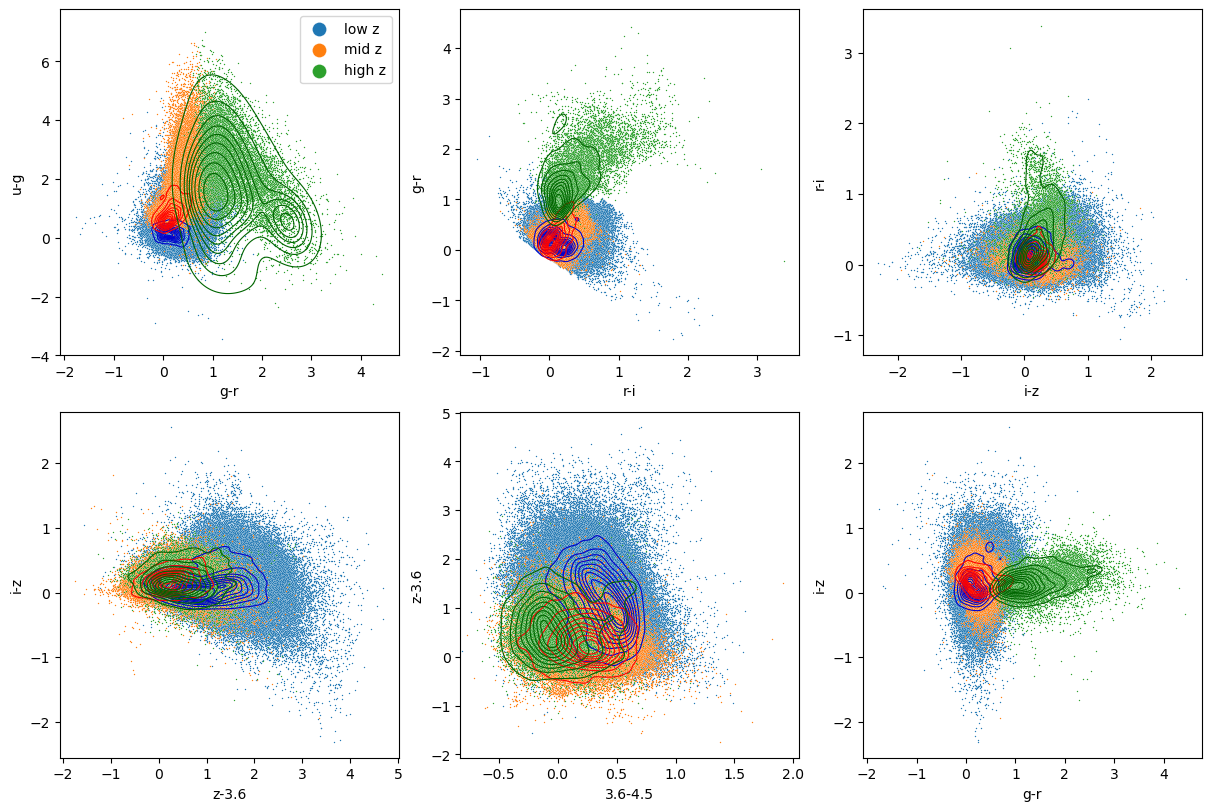

In [106]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), layout="constrained")

iax = (0,0)
xdata = "g-r"
ydata = "u-g"
xerrdata = "e_g-r"
yerrdata = "e_u-g"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="darkgreen")
axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="upper right")

iax = (0,1)
xdata = "r-i"
ydata = "g-r"
xerrdata = "e_r-i"
yerrdata = "e_g-r"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (0,2)
xdata = "i-z"
ydata = "r-i"
xerrdata = "e_i-z"
yerrdata = "e_r-i"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (1,0)
xdata = "z-3.6"
ydata = "i-z"
xerrdata = "e_z-3.6"
yerrdata = "e_i-z"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (1,1)
xdata = "3.6-4.5"
ydata = "z-3.6"
xerrdata = "e_3.6-4.5"
yerrdata = "e_z-3.6"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (1,2)
xdata = "g-r"
ydata = "i-z"
xerrdata = "e_g-r"
yerrdata = "e_i-z"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_low_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_mid_z, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="r")
sns.kdeplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="darkgreen")
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)


The separation of regions with different redshift is clearly visible. Especially, one could construct a 3D color-color-color plot to separate regions more precisely.

We, additionally, should check if there is any separation between the spectroscopically identified quasars and nonconfirmed objects. Let's check the color-redshift and color-color plots.

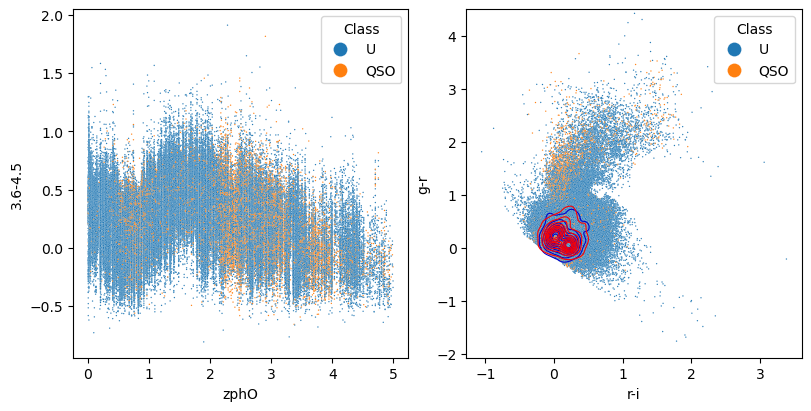

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(8,4), layout="constrained")

iax = 0
xdata = "zphO"
ydata = "3.6-4.5"
sns.scatterplot(ax=axs[iax], data=catalog[robust], x=xdata, y=ydata, s=1, hue="Class")
axs[iax].legend(title="Class", markerscale=10, loc="upper right")

iax = 1
xdata = "r-i"
ydata = "g-r"
xerrdata = "e_r-i"
yerrdata = "e_g-r"
sns.scatterplot(ax=axs[iax], data=catalog[robust], x=xdata, y=ydata, s=1, alpha=1, hue="Class")
sns.kdeplot(ax=axs[iax], data=cat_sample_robust[cat_sample_robust["Class"]=="QSO"], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="mediumblue")
sns.kdeplot(ax=axs[iax], data=cat_sample_robust[cat_sample_robust["Class"]=="U"], x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="r")
axs[iax].legend(title="Class", markerscale=10, loc="upper right")
plt.show()

These plots seem not to separate classified from unclassified quasars at a significant level.

### YJHK-ugriz[3.6][4.5] magnitudes

At last, we investigate the linear correlation between the YJHK infrared magnitudes (Vega system?) and ugriz plus [3.6] and [4.5] magnitudes.

<Axes: xlabel='4.5mag', ylabel='Kmag'>

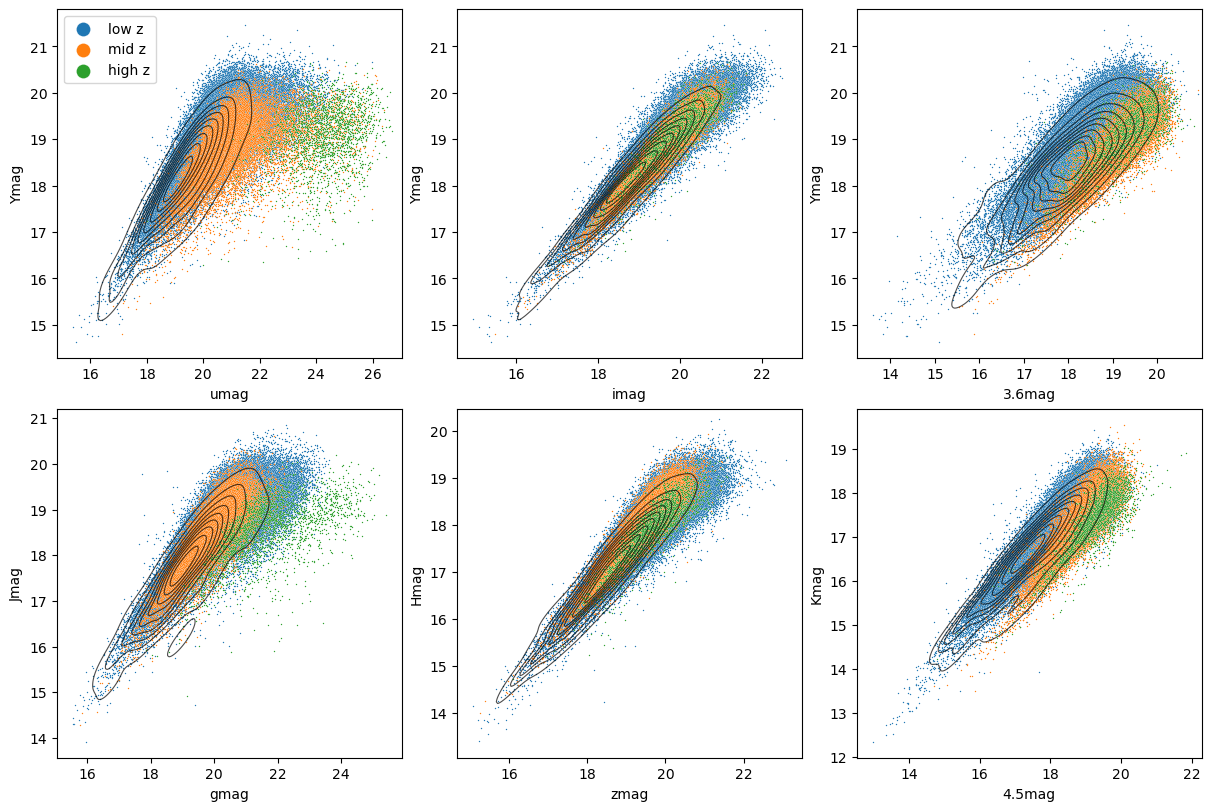

In [108]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), layout="constrained")

iax = (0,0)
xdata = "umag"
ydata = "Ymag"
xerrdata = "e_umag"
yerrdata = "e_Ymag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_robust, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="k", alpha=0.7)
axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10, loc="upper left")

iax = (0,1)
xdata = "imag"
ydata = "Ymag"
xerrdata = "e_imag"
yerrdata = "e_Ymag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_robust, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="k", alpha=0.7)
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (0,2)
xdata = "3.6mag"
ydata = "Ymag"
xerrdata = "e_3.6mag"
yerrdata = "e_Ymag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_robust, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="k", alpha=0.7)
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (1,0)
xdata = "gmag"
ydata = "Jmag"
xerrdata = "e_gmag"
yerrdata = "e_Jmag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_robust, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="k", alpha=0.7)
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (1,1)
xdata = "zmag"
ydata = "Hmag"
xerrdata = "e_zmag"
yerrdata = "e_Hmag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_robust, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="k", alpha=0.7)
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)

iax = (1,2)
xdata = "4.5mag"
ydata = "Kmag"
xerrdata = "e_4.5mag"
yerrdata = "e_Kmag"
sns.scatterplot(ax=axs[iax], data=catalog[robust & low_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & mid_z], x=xdata, y=ydata, s=1, alpha=1)
sns.scatterplot(ax=axs[iax], data=catalog[robust & high_z], x=xdata, y=ydata, s=1, alpha=1)
sns.kdeplot(ax=axs[iax], data=cat_sample_robust, x=xdata, y=ydata, 
            weights=1/(catalog[xerrdata]**2+catalog[yerrdata]**2), 
            linewidths=0.8, color="k", alpha=0.7)
#axs[iax].legend(labels=["low z", "mid z", "high z"], markerscale=10)


In [109]:
mag_corr_robust = catalog.loc[robust, mag.append([mag_oth[:4]])].corr(numeric_only=True)

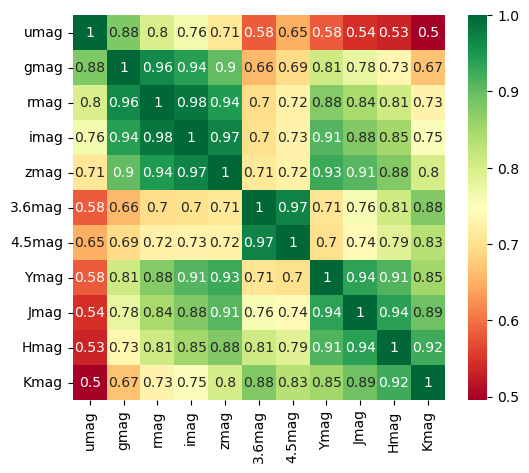

In [110]:
plt.figure(figsize=(6,5))
sns.heatmap(mag_corr_robust, annot=True, cmap='RdYlGn')
plt.show()

The linear dependence is good for almost all the cases. So, one could find YJHK magnitudes in linear regression, given other magnitudes. However, we must keep in mind that the Vega magnitudes weren't corrected for galactic extinction (the "Au" column and derivations from it).

# FEATURE ENGINEERING (P. 2)

We're going to select and prepare a dataset for further modelling. We'll perform:
- variable transformation for fitting ~~three~~ relations:
  1. ~~photometric redshift vs. binomial of all magnitudes~~,
  3. ~~Vega and UV magnitudes vs. sum of ugriz magnitudes (and galactic extinction?)~~,
  1. color vs. polynomial of photometric redshift for a regression;
- categorical variables encoding;
- feature scaling.


## Polynomial of photometric redshift

We'll use sklearn package to calculate monomials out of the zphO feature, in order to be able to fit a polynomial relation between color and redshift.

In [111]:
from sklearn.preprocessing import PolynomialFeatures

First, we initiate the transformer with the desired polynomial degree.

In [112]:
pf = PolynomialFeatures(degree=10)

In [113]:
feat_array = pf.fit_transform(catalog.loc[robust, "zphO"].to_frame())

In [114]:
feat_names = pf.get_feature_names_out()
feat_names

array(['1', 'zphO', 'zphO^2', 'zphO^3', 'zphO^4', 'zphO^5', 'zphO^6',
       'zphO^7', 'zphO^8', 'zphO^9', 'zphO^10'], dtype=object)

In [115]:
zphO_poly = pd.DataFrame(feat_array, columns=feat_names, index=catalog[robust].index)
zphO_poly

1   zphO    zphO^2     zphO^3     zphO^4     zphO^5      zphO^6  \
0       1.0  0.965  0.931225   0.898632   0.867180   0.836829    0.807540   
1       1.0  0.285  0.081225   0.023149   0.006598   0.001880    0.000536   
3       1.0  2.015  4.060225   8.181353  16.485427  33.218136   66.934543   
4       1.0  2.105  4.431025   9.327308  19.633983  41.329533   86.998668   
10      1.0  0.965  0.931225   0.898632   0.867180   0.836829    0.807540   
...     ...    ...       ...        ...        ...        ...         ...   
885493  1.0  0.205  0.042025   0.008615   0.001766   0.000362    0.000074   
885494  1.0  1.205  1.452025   1.749690   2.108377   2.540594    3.061416   
885495  1.0  2.165  4.687225  10.147842  21.970078  47.565219  102.978700   
885499  1.0  1.475  2.175625   3.209047   4.733344   6.981683   10.297982   
885502  1.0  1.955  3.822025   7.472059  14.607875  28.558396   55.831664   

            zphO^7      zphO^8        zphO^9       zphO^10  
0         0.779276    0.752001  7.256811e-01  7.002823e-01  
1         0.000153    0.000044  1.240520e-05  3.535482e-06  
3       134.873104  271.769305  5.476151e+02  1.103445e+03  
4       183.132195  385.493271  8.114633e+02  1.708130e+03  
10        0.779276    0.752001  7.256811e-01  7.002823e-01  
...            ...         ...           ...           ...  
885493    0.000015    0.000003  6.394178e-07  1.310807e-07  
885494    3.689006    4.445252  5.356529e+00  6.454617e+00  
885495  222.948885  482.684336  1.045012e+03  2.262450e+03  
885499   15.189523   22.404547  3.304671e+01  4.874389e+01  
885502  109.150903  213.390015  4.171775e+02  8.155820e+02  

[515457 rows x 11 columns]

## Feature scaling

We now perform scaling of the features that will be used in future regression and classification models. So far, we identified three data fitting problems:
1. colors vs. redshift polynomial regression,
2. colors vs. colors classification,
3. Vega magnitudes vs. standard magnitudes linear regression.

Actually, all the features in the above problems have quite similar value ranges, so feature scaling is rather not needed. Anyway, for the purposes of this project, it is very instructive to perform feature scaling using scikit-learn library.

We'll work with the robust subset of the catalog only.

In [116]:
from sklearn.preprocessing import StandardScaler

We will treat features and their errors separately – standard scaling will be applied for the features, while errors will be only divided by the corresponding feature standard deviation, since
$$
    \frac{x\pm u(x)-\mu}{\sigma} = \frac{x-\mu}{\sigma}\pm\frac{u(x)}{\sigma},
$$
where $x$ is a given feature value, $u(x)$ is its uncertainty, $\mu$ is its mean and $\sigma$ is its standard deviation.

In [117]:
scaled_feat = mag.append([mag_oth, color, pd.Index(["zphO", "zphIR"])])
err_feat = mag_all.append([mag_oth_all,
                           color_all,
                           photz]).difference(scaled_feat, sort=False)

In [118]:
scaled_feat

Index(['umag', 'gmag', 'rmag', 'imag', 'zmag', '3.6mag', '4.5mag', 'Ymag',
       'Jmag', 'Hmag', 'Kmag', 'FUV', 'NUV', 'u-g', 'g-r', 'r-i', 'i-z',
       'z-3.6', '3.6-4.5', 'zphO', 'zphIR'],
      dtype='object')

In [119]:
err_feat

Index(['e_umag', 'e_gmag', 'e_rmag', 'e_imag', 'e_zmag', 'e_3.6mag',
       'e_4.5mag', 'e_Ymag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'e_FUV', 'e_NUV',
       'e_u-g', 'e_g-r', 'e_r-i', 'e_i-z', 'e_z-3.6', 'e_3.6-4.5', 'b_zphO',
       'B_zphO', 'zphOP', 'b_zphIR', 'B_zphIR', 'zphIRP'],
      dtype='object')

Let's scale the features with the StandardScaler transformer object.

In [120]:
scaler = StandardScaler()

In [121]:
scaled_array = scaler.fit_transform(catalog.loc[robust, scaled_feat])
feat_names = scaler.get_feature_names_out()

In [122]:
cat_scaled = pd.DataFrame(scaled_array, columns=feat_names, index=catalog[robust].index)
cat_scaled

umag      gmag      rmag      imag      zmag    3.6mag    4.5mag  \
0      -1.706471 -1.943415 -2.021934 -1.918211 -2.043107 -2.155098 -2.121782   
1       1.338189  1.268664  0.693173  0.606137  0.442531 -0.062717 -0.016434   
3      -1.837938 -1.901856 -1.918444 -1.985201 -2.137554 -1.222861 -1.365280   
4      -0.943812 -0.926595 -0.775988 -0.808093 -1.134188  0.007594 -0.001510   
10     -0.481436 -0.432501 -0.452326 -0.301948 -0.354162 -1.170734 -1.208010   
...          ...       ...       ...       ...       ...       ...       ...   
885493  1.294118  1.979791  1.967529  1.871501  2.028139  1.181073  1.222209   
885494  0.157973  0.626802  0.628238  0.737990  0.815876  0.743443  0.518513   
885495 -0.842971 -1.131622 -1.314748 -1.357835 -1.467532 -0.565810 -0.651252   
885499 -0.447822 -0.127732 -0.249403 -0.343418 -0.149711  0.079118  0.004230   
885502 -0.574808 -0.284734 -0.080977 -0.144575 -0.175267  0.755566  0.760732   

            Ymag      Jmag      Hmag  ...      FUV       NUV       u-g  \
0            NaN       NaN       NaN  ... -0.47314 -1.423228 -0.278383   
1       0.948124  1.251543  0.926131  ...      NaN       NaN  0.645391   
3      -1.799409 -1.912483 -1.781908  ...      NaN       NaN -0.619778   
4            NaN       NaN       NaN  ...      NaN       NaN -0.401965   
10      0.548311 -0.131253 -0.329666  ...      NaN  0.240950 -0.272204   
...          ...       ...       ...  ...      ...       ...       ...   
885493       NaN       NaN       NaN  ...      NaN       NaN -0.635226   
885494       NaN       NaN       NaN  ...      NaN       NaN -0.721733   
885495       NaN       NaN       NaN  ...      NaN       NaN  0.149519   
885499 -0.192082  0.384366  0.496861  ...      NaN       NaN -0.712464   
885502       NaN       NaN       NaN  ...      NaN       NaN -0.712464   

             g-r       r-i       i-z     z-3.6   3.6-4.5      zphO     zphIR  
0      -0.378330 -1.015372  0.149401 -0.092398  0.324944 -0.564635       NaN  
1       2.343046  0.608389  0.738043  0.681623 -0.172278 -1.356601 -1.431963  
3      -0.571744 -0.128218  0.243927 -1.385968  0.831374  0.658252  0.427691  
4      -0.809271 -0.026061  1.120446 -1.555616  0.034898  0.763071       NaN  
10     -0.076332 -0.870201  0.149401  0.980023  0.398606 -0.564635 -0.586665  
...          ...       ...       ...       ...       ...       ...       ...  
885493  0.693933  0.963251 -0.280265  1.289026 -0.416285 -1.449773       NaN  
885494  0.201914 -0.402429 -0.172849  0.183281  0.743900 -0.285118       NaN  
885495  0.239239 -0.101334  0.188071 -1.293570  0.463061  0.832951       NaN  
885499  0.364789  0.414828 -0.808755 -0.302944  0.283509  0.029339 -0.248547  
885502 -0.775338  0.301918  0.093544 -1.182995 -0.181486  0.588373       NaN  

[515457 rows x 21 columns]

We can get variances (not deviations!) with the var_ attribute.

In [123]:
scaled_var = scaler.var_
scaled_var

array([1.79221686, 1.17242963, 0.97140014, 0.88442929, 0.80994649,
       0.68045625, 0.7588407 , 0.55182334, 0.52612032, 0.47226181,
       0.49099517, 1.01995397, 1.04351478, 0.41905501, 0.08685041,
       0.03459151, 0.05416738, 0.43584889, 0.04717878, 0.73723413,
       0.78723361])

Because zphO and zphIR errors are described with 3 columns each (i.e., b_zph{O,IR}, B_zph{O,IR} and zph{O,IR}P), we need to match the array with variables to the frame of errors columns: B_zph{O,IR} take the same variance as b_zph{O,IR} while zph{O,IR}P should not be scaled (variance equal to 1).

In [124]:
scaled_var = np.insert(scaled_var,
                       (-2, -1, -1, scaled_var.size),
                       (scaled_var[-2], 1.0, scaled_var[-1], 1.0))
scaled_var

array([1.79221686, 1.17242963, 0.97140014, 0.88442929, 0.80994649,
       0.68045625, 0.7588407 , 0.55182334, 0.52612032, 0.47226181,
       0.49099517, 1.01995397, 1.04351478, 0.41905501, 0.08685041,
       0.03459151, 0.05416738, 0.43584889, 0.04717878, 0.73723413,
       0.73723413, 1.        , 0.78723361, 0.78723361, 1.        ])

Now, we're ready for building the frame of errors for the scaled features. It's much more straightforward to do it by a usual broadcasting operation than using again the scaler transformer – of course, we can reset the with_mean parameter to False, but we would also have to deal with inconsistencies of the shape and column names of the frame with errors with respect to the frame with features.

In [125]:
cat_err_scaled = catalog.loc[robust, err_feat]/np.sqrt(scaled_var)
cat_err_scaled

e_umag    e_gmag    e_rmag    e_imag    e_zmag  e_3.6mag  e_4.5mag  \
0       0.010458  0.007388  0.008117  0.009570  0.015556  0.036368  0.035587   
1       0.145660  0.038789  0.027395  0.032963  0.116671  0.073949  0.097576   
3       0.019421  0.028630  0.018263  0.027647  0.023334  0.050915  0.050510   
4       0.018674  0.012930  0.013190  0.019140  0.035557  0.072736  0.091836   
10      0.023903  0.012930  0.012175  0.017013  0.042224  0.050915  0.051658   
...          ...       ...       ...       ...       ...       ...       ...   
885493  0.103082  0.052642  0.057833  0.059547  0.197784  0.174567  0.274361   
885494  0.064987  0.033248  0.038555  0.049977  0.188895  0.146685  0.175637   
885495  0.056023  0.030477  0.022322  0.024457  0.047779  0.061826  0.068877   
885499  0.042577  0.033248  0.025365  0.034027  0.098892  0.095769  0.115943   
885502  0.048553  0.023089  0.030438  0.040407  0.117782  0.126076  0.183673   

          e_Ymag    e_Jmag    e_Hmag  ...     e_r-i     e_i-z   e_z-3.6  \
0            NaN       NaN       NaN  ...  0.064744  0.071511  0.050146   
1       0.153463  0.244023  0.228459  ...  0.221034  0.470401  0.183937   
3       0.026923  0.030331  0.037834  ...  0.170026  0.143601  0.071127   
4            NaN       NaN       NaN  ...  0.119382  0.157752  0.103001   
10      0.126540  0.115808  0.146970  ...  0.107534  0.177156  0.085792   
...          ...       ...       ...  ...       ...       ...       ...   
885493       NaN       NaN       NaN  ...  0.429631  0.801762  0.346801   
885494       NaN       NaN       NaN  ...  0.324968  0.757834  0.316069   
885495       NaN       NaN       NaN  ...  0.171128  0.209526  0.101044   
885499  0.071347  0.126837  0.167343  ...  0.218336  0.406370  0.180258   
885502       NaN       NaN       NaN  ...  0.260312  0.483828  0.224934   

        e_3.6-4.5    b_zphO    B_zphO  zphOP   b_zphIR   B_zphIR  zphIRP  
0        0.198609  0.838552  1.327707  0.893       NaN       NaN     NaN  
1        0.481675  0.104819  0.465862  0.967  0.056353  0.309942    0.89  
3        0.280045  2.189551  2.504008  0.847  1.746948  2.282303    0.99  
4        0.460391  2.271077  2.597181  0.960       NaN       NaN     NaN  
10       0.283393  0.943371  1.385939  0.921  0.732591  1.211593    0.67  
...           ...       ...       ...    ...       ...       ...     ...  
885493   1.284622  0.058233  0.361043  0.884       NaN       NaN     NaN  
885494   0.898057  1.153008  1.700396  0.940       NaN       NaN     NaN  
885495   0.362541  2.282724  3.097982  0.851       NaN       NaN     NaN  
885499   0.590342  1.327707  1.793569  0.903  1.183416  1.380652    0.90  
885502   0.878563  1.886741  2.469069  0.943       NaN       NaN     NaN  

[515457 rows x 25 columns]

## One-hot encoding

Let's make the one-hot encoding for the categorical variable "Class".

In [126]:
cat_dummy = pd.get_dummies(catalog, columns=["Class"])

In [127]:
cat_dummy.head()

RAdeg      DEdeg  zsp    umag    gmag    rmag    imag    zmag  3.6mag  \
0  0.000629  35.517841  NaN  18.571  18.330  18.197  18.241  18.089  17.119   
1  0.000831  15.197328  NaN  22.647  21.808  20.873  20.615  20.326  18.845   
2  0.001527  27.732283  NaN  22.052  21.703  21.603  21.550  21.915  20.174   
3  0.001914   9.385637  NaN  18.395  18.375  18.299  18.178  18.004  17.888   
4  0.002595  31.328981  NaN  19.592  19.431  19.425  19.285  18.907  18.903   

   4.5mag  ...  e_log_g-r  e_log_r-i  robust  robust_contamin  Class_??  \
0  16.739  ...   0.003114   0.004074    True            False         0   
1  18.573  ...   0.011258   0.012618    True            False         0   
2  19.767  ...   0.025557   0.036452   False            False         0   
3  17.398  ...   0.010024   0.010132    True            False         0   
4  18.586  ...   0.005449   0.007071    True            False         0   

   Class_CELG  Class_GALAXY  Class_QSO  Class_STAR  Class_U  
0           0             0          0           0        1  
1           0             0          0           0        1  
2           0             0          0           0        1  
3           0             0          0           0        1  
4           0             0          0           0        1  

[5 rows x 86 columns]

In [128]:
cat_dummy.loc[:,"Class_??":"Class_U"].sum()

Class_??             5
Class_CELG          32
Class_GALAXY       557
Class_QSO       150443
Class_STAR         743
Class_U         733669
dtype: int64

# STATISTICAL TESTING

## The three hypotheses

Here, we formulate three important null hypotheses $H_0$ about the data.
1. $H_0$: *Objects of all spectral classes have equal mean of each color.* We should find a way
to extract contaminants in the unclassified (U) objects. It would be ideal if there is any
parameter which differentiates classes at a significant level. Such a parameter could be
for instance the colors; if this hypothesis was rejected, there would be a possibility for
a machine learning algorithm to seek likely contaminants within the U class.
2. $H_0$: *The mean zsp is equal to the mean zphO for the objects having the spectrometry
performed.* We need to check if the algorithm for calculating the photometric redshift
out of the relationship of the ugriz colors and the spectroscopic redshift utilized by
[Richards et al., 2015] gives a reliable results at a given significance level. Rejection of
this hypothesis would mean that the algorithm works incorrectly (for example, when
the colors vs. zsp relationship have too little variability to be efficient in designating
the photometric redshift).
3. $H_0$: *The mean zphO is equal to the mean zphIR for the objects having the JHK photometry performed.* We also ought to test the algorithm of [Richards et al., 2015] for calculating the photometric redshift utilizing the ugrizJHK magnitudes. Rejection of this
hypothesis would mean that the algorithm works incorrectly when including/excluding
the JHK colors (for example, when the colors vs. zsp relationship with/without JHK
have too little variability to be efficient in designating the photometric redshift).

## Significance test of the hypothesis

### Hypotheses and the critical regions construction

We choose the first hypothesis of the above three to be tested. The null hypothesis $H_0$ and the alternative hypothesis $H_1$ are:

$H_0$: *Objects of all spectral classes have equal mean of each color.* <br>
$H_1$: *Objects of all spectral classes do not have equal mean of each color.*

The form of the alternative hypothesis $H_1$ indicates that it is a composite hypothesis, so we need to perform the significance test (according to the R. Fisher's paradigm, without dealing with the type II error as in the full statistical test within the Neyman-Pearson theory; Fisher's null hypothesis testing is considered currently as a part of the Neyman-Pearson theory) where we deal with the critical region for rejecting the null hypothesis $H_0$ only and the region of acceptance of $H_0$ is not defined.

Before we proceed with the proper significance test, let us check the means of all colors in each class manually. First for all objects, then for the robust objects.

In [129]:
catalog.groupby(by="Class")[color].mean()

u-g       g-r       r-i       i-z     z-3.6   3.6-4.5
Class                                                             
??      1.492800  0.564600  0.004400 -0.095000  0.546000 -0.289400
CELG    0.731969  0.521781  0.113625  0.440563  0.230313 -0.201594
GALAXY  0.743580  0.434276  0.205104  0.231756  0.893801  0.087117
QSO     0.558594  0.183332  0.115520  0.136751  0.871306  0.322694
STAR    1.024052  0.263903  0.146022  0.124980  0.213771 -0.089590
U       0.415345  0.288302  0.198063  0.154459  1.205717  0.292439

In [130]:
catalog[robust | robust_contamin].groupby(by="Class")[color].mean()

u-g       g-r       r-i       i-z     z-3.6   3.6-4.5
Class                                                             
??      1.189000  0.274000  0.126000  0.139000  0.235000 -0.094000
CELG    1.212667  0.365167  0.175167  0.121667  0.557000 -0.157167
GALAXY  0.832996  0.456788  0.232286  0.242665  0.944755  0.034710
QSO     0.568583  0.180204  0.104394  0.114468  0.805516  0.327814
STAR    1.206537  0.354115  0.184078  0.148907  0.196789 -0.090107
U       0.379381  0.262743  0.156329  0.118012  1.094999  0.304199

The statistical (or significance) test will tell if the numbers in columns differ statistically with a given significance level. We can also visualize the values of colors in robust subsample as a boxplot.

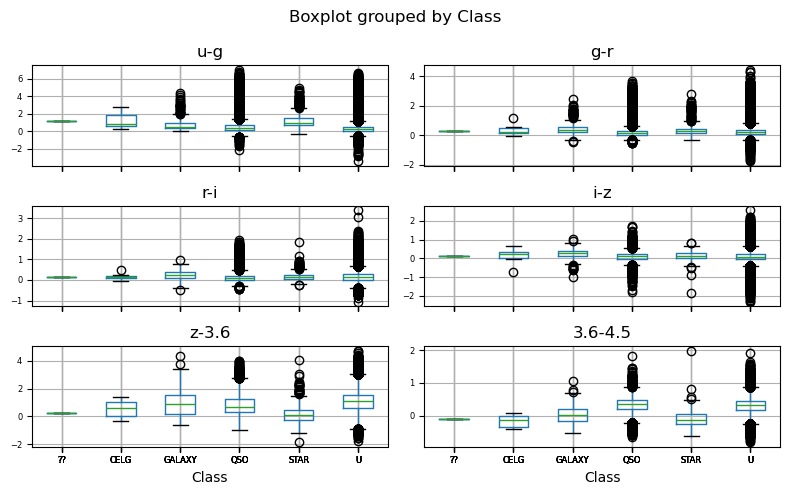

In [142]:
catalog[robust | robust_contamin].boxplot(column=color.tolist(), 
                                          by="Class", 
                                          fontsize=6, 
                                          figsize=(8,5),
                                          sharey=False)
plt.tight_layout()

### The ANOVA test (despite the violation of assumptions)

The natural and simplest choice for the test model for the above hypotheses is one-way analysis of variance (ANOVA) which utilizes the Fisher-Snedecor F distribution as the test statistic for determining whether the means in given groups of data are statistically equal. However, this model has the following assumptions which must be met by data:
* Response variable residuals are normally distributed (or approximately normally distributed).
* Variances of populations are equal.
* Responses for a given group are independent and identically distributed random variables.

The third assumption is believed to be met.

When it comes to variances of the populations, we don't have information about them. This is an argument against performing the ANOVA test. But let's at least check the variances of colors in all our samples of spectral classes.

In [132]:
catalog.groupby(by="Class")[color].var()

u-g       g-r       r-i       i-z     z-3.6   3.6-4.5
Class                                                             
??      0.398181  0.124610  0.024623  0.125453  0.072822  0.033722
CELG    0.916492  0.177749  0.246816  0.600402  0.421983  0.063953
GALAXY  0.560659  0.153752  0.094833  0.083869  0.665404  0.079169
QSO     0.518101  0.079453  0.029016  0.036974  0.368689  0.040996
STAR    0.899340  0.267376  0.086172  0.074126  0.598913  0.053438
U       0.349734  0.107090  0.057239  0.077094  0.415191  0.049827

In [133]:
catalog[robust | robust_contamin].groupby(by="Class")[color].var()

u-g       g-r       r-i       i-z     z-3.6   3.6-4.5
Class                                                             
??           NaN       NaN       NaN       NaN       NaN       NaN
CELG    0.966732  0.192393  0.029162  0.220075  0.493758  0.043333
GALAXY  0.716477  0.221156  0.055169  0.081064  0.810526  0.066733
QSO     0.592804  0.073089  0.022930  0.031114  0.375630  0.041743
STAR    0.874246  0.224600  0.041493  0.054845  0.500986  0.053122
U       0.361828  0.089250  0.037305  0.060708  0.434416  0.048599

We can see that differences between variances are relatively high between classes in each color. It's hard to say more about variances of our samples. 

Let us, moreover, check the first assumption that the data is normally distributed. The basic test statistic for this purpose is chi-squared, but more responsive approach is provided by the Kolmogorov-Smirnov test statistic, which we are going to utilize. This test compares cumulative distribution functions (cdf) of two distributions; the statistic obeys the Kolmogorov distribution and has the right-tailed critical region.

For the K-S test we choose the confidence level of 0.99, i.e., we will reject the null hypothesis, that the data distribution is normal, when the test statistic exceeds its value assigned to the significance level of 0.01, i.e., when the p-value is lesser than 0.01.

In [134]:
from scipy.stats import kstest

The scipy.stats.kstest function performs the KS test for given random variables (rvs) and a cumulative distribution function (cdf). We will use the predefined normal distribution as the cdf, calling the argument cdf="norm". One should note that this is the normalized Gaussian distribution (zero mean and unit variance), so we need to test the normalized sample of colors we have prepared before. Note that this normalized data is restricted to the robust objects sample only.

In [135]:
kstest(rvs=cat_scaled[color], cdf="norm")

KstestResult(statistic=array([0.18058103, 0.12069878, 0.04865967, 0.06025327, 0.03739271,
       0.03858413]), pvalue=array([0., 0., 0., 0., 0., 0.]), statistic_location=array([ 0.05065318,  0.35121603, -0.35941563,  0.32126714, -0.62103475,
       -0.01114139]), statistic_sign=array([ 1.,  1.,  1.,  1.,  1., -1.]))

The critical value of the Kolmogorov-Smirnov statistics for the significance level of 0.01 for the sample of size $N$ is equal to $\frac{1.63}{\sqrt N}$. For the robust subsample it equals $0.0023$. We can see that the test statistic exceeds this limit greatly for each color. Also, the p-values for each case is zero. Thus, we reject the hypothesis that the distribution of colors is Gaussian.

This means the assumptions for the ANOVA test are not satisfied by the color variables in our sample. Nevertheless, studies based on Monte-Carlo simulations on the sensitivity of the test to violations of the assumption of the normal distribution of the variables conclude that “consequences of such violations are less severe than previously thought” [Wikipedia: One-way analysis of variance]. Hence, it would be interesting and educative to see what result ANOVA gives for these variables; we could compare it with the further, appropriate methods. For this test we choose the typical (but more strict than when we were checking the distribution) significance level of 0.05; the underlying Fisher-Snedecor F statistic has the right-tailed critical region. Remember that the following ANOVA result may be wrong!

In [136]:
from scipy.stats import f_oneway

In [137]:
color_U = catalog.loc[robust & (catalog["Class"]=="U"), color]
color_QSO = catalog.loc[robust & (catalog["Class"]=="QSO"), color]
color_GALAXY = catalog.loc[robust_contamin & (catalog["Class"]=="GALAXY"), color]
color_CELG = catalog.loc[catalog["Class"]=="CELG", color] # we will exclude this rare class from the tests
color_STAR = catalog.loc[robust_contamin & (catalog["Class"]=="STAR"), color]
color_HARD = catalog.loc[catalog["Class"]=="??", color] # we will exclude this rare class from the tests

In [138]:
f_oneway(color_U, color_QSO, color_GALAXY, color_STAR)

F_onewayResult(statistic=array([2823.69417629, 2411.78202673, 2362.48834987,   33.3951101 ,
       6134.29660459,  999.98943446]), pvalue=array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.42467357e-21,
       0.00000000e+00, 0.00000000e+00]))

The critical value for the significance level 0.05 for the Fisher-Snedecor F statistic of $(3, s)$ degrees of freedom where $s>>120$ is $2.6049$ which is much less than the obtained test statistics for each color; also, all p-values are much lesser than 0.05. This means that the test statistic is in the critical (rejection) region, so if the assumptions of the test were satisfied, the null hypothesis that the means of colors are equal for each spectral type would be rejected.

### The Kruskal-Wallis test

The non-parametric alternative for ANOVA is the Kruskal-Wallis rank test which does not assume the distribution of data to be normal. It assigns ranks to the data points and uses the H statistic. For the number of samples $k$ greater than $3$ and the number of examples $n_i$ in each sample $i=1,\dots,k$ is greater than $5$, the H statistic has the chi-squared distribution with $k-1$ degrees of freedom – for the null hypothesis that all samples come from the same population.

We use the scipy.stats.kruskal function to perform the Kruskal-Wallis test and again choose the significance level of $0.05$.

In [139]:
from scipy.stats import kruskal

In [140]:
kruskal(color_U, color_QSO, color_GALAXY, color_STAR)

KruskalResult(statistic=array([12384.45884792, 13491.84136093,  6691.81937038,   154.81156871,
       18387.01448592,  2348.5468641 ]), pvalue=array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.41387834e-33,
       0.00000000e+00, 0.00000000e+00]))

The critical value of the chi-squared statistic with $3$ degrees of freedom for the significance level of $0.05$ is equal to $7.815$. Our results are much greater than this limit; also the p-values are much lesser than the significance level. This indicates that we should reject the null hypothesis that the colors of objects of different classes have the same distribution.

### Conclusions about the hypothesis

The Kruskal-Wallis significance test showed that the means (or, in general, the distributions) of each color are not equal for all the spectral classes of objects in the catalog. This indicates that there are significant differences in distributions of colors for each class, which should enable us to differentiate classes in the color-color plots in future classification algorithm analysis.